In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import shutil, os
from PyHa.statistics import *
from PyHa.IsoAutio import *
from PyHa.visualizations import *
from PyHa.annotation_post_processing import *
import pandas as pd

In [3]:
#path = "./025_Mixed_Bird_Train/"
#path = "./Mixed_Bird/"
path = "C:/Users/Siloux/Desktop/E4E/Cosmos_data/"

In [4]:
#manual_df = pd.read_csv("cosmos_labeled_data.csv")
manual_df = pd.read_csv("C:/Users/Siloux/Desktop/E4E/cosmos_labeled_data_files_added.csv")

In [5]:
# need to find the files that are skipped over in tweetynet
def annotations_skipped(df_1, df_2):
    new_df = pd.DataFrame()
    if df_1["MANUAL ID"] & ~df_2.isin(["MANUAL ID"]):
        new_df = df_1["MANUAL ID"]
        
    return new_df

In [6]:
def rename_with_only_species_name(df):
    name = df["MANUAL ID"].split(" ")
    species_name = name[0] + " " + name[1]
    df["MANUAL ID"] = species_name
    return df

### Dictionary that defines the isolation technique and parameters used to generate automated labels 

In [7]:
# Example parameters for BirdNET
isolation_parameters_birdnet = {
   "model" : "birdnet",
   "output_path" : "outputs",
   "min_conf" : 0.5,
   "filetype" : "mp3", 
   "num_predictions" : 1,
   "write_to_csv" : True
}

# Example Parameters for Microfaune
# isolation_parameters = {
#      "model" : "microfaune",
#      "technique" : "steinberg",
#      "threshold_type" : "median",
#      "threshold_const" : 2.0,
#      "threshold_min" : 0.0,
#      "window_size" : 2.0,
#      "chunk_size" : 5.0
# }

# Example parameters for TweetyNET
isolation_parameters_tweety = {
    "model" : "tweetynet",
    "tweety_output": True,
   "technique" : "steinberg",
    "threshold_type" : "median",
    "threshold_const" : 2.0,
    "threshold_min" : 0.0,
    "window_size" : 2.0,
    "chunk_size" : 5.0
}

# TweetyNet to BirdNET Pipeline

In [40]:
automated_df_tweety = generate_automated_labels(path,isolation_parameters_tweety)
automated_chunked_df = annotation_chunker(automated_df_tweety, 3)

C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\librosa\core\audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Error in detection, skipping XC104219 - Southern Nightingale-Wren - Microcerculus marginatus.mp3
integer division or modulo by zero
Error in isolating bird calls from XC108672 - Buff-throated Woodcreeper - Xiphorhynchus guttatus eytoni.mp3
max() arg is an empty sequence
Error in detection, skipping XC172895 - Rufous-collared Sparrow - Zonotrichia capensis subtorquata.mp3
integer division or modulo by zero
Error in isolating bird calls from XC199962 - Blue-grey Tanager - Thraupis episcopus.mp3
single positional indexer is out-of-bounds
Error in detection, skipping XC207197 - Blue-grey Tanager - Thraupis episcopus.mp3
integer division or modulo by zero
Error in isolating bird calls from XC232389 - Buff-throated Woodcreeper - Xiphorhynchus guttatus guttatoides.mp3
max() arg is an empty sequence
Error in isolating bird calls from XC2371 - Buff-throated Woodcreeper - Xiphorhynchus guttatus.mp3
single positional indexer is out-of-bounds
Error in isolating bird calls from XC292419 - Pale-brea

In [41]:
automated_df_tweety

,OFFSET,DURATION,FOLDER,IN FILE,CHANNEL,CLIP LENGTH,SAMPLE RATE,MANUAL ID,CONFIDENCE,FILEPATH
0,1.883721,0.116279,C:/Users/Siloux/Desktop/E4E/Cosmos_data/,XC100027 - Southern Nightingale-Wren - Microce...,0,81.528163,44100,bird,0.543653,C:/Users/Siloux/Desktop/E4E/Cosmos_data/XC1000...
1,3.976744,0.046512,C:/Users/Siloux/Desktop/E4E/Cosmos_data/,XC100027 - Southern Nightingale-Wren - Microce...,0,81.528163,44100,bird,0.230806,C:/Users/Siloux/Desktop/E4E/Cosmos_data/XC1000...
2,5.976744,0.046512,C:/Users/Siloux/Desktop/E4E/Cosmos_data/,XC100027 - Southern Nightingale-Wren - Microce...,0,81.528163,44100,bird,0.204163,C:/Users/Siloux/Desktop/E4E/Cosmos_data/XC1000...
3,6.023256,0.046512,C:/Users/Siloux/Desktop/E4E/Cosmos_data/,XC100027 - Southern Nightingale-Wren - Microce...,0,81.528163,44100,bird,0.264257,C:/Users/Siloux/Desktop/E4E/Cosmos_data/XC1000...
4,6.069767,0.116279,C:/Users/Siloux/Desktop/E4E/Cosmos_data/,XC100027 - Southern Nightingale-Wren - Microce...,0,81.528163,44100,bird,0.544028,C:/Users/Siloux/Desktop/E4E/Cosmos_data/XC1000...
...,...,...,...,...,...,...,...,...,...,...
55642,1.511628,0.325581,C:/Users/Siloux/Desktop/E4E/Cosmos_data/,XC9881 - Blue-grey Tanager - Thraupis episcopu...,0,14.700000,44100,bird,0.943661,C:/Users/Siloux/Desktop/E4E/Cosmos_data/XC9881...
55643,1.860465,0.139535,C:/Users/Siloux/Desktop/E4E/Cosmos_data/,XC9881 - Blue-grey Tanager - Thraupis episcopu...,0,14.700000,44100,bird,0.855924,C:/Users/Siloux/Desktop/E4E/Cosmos_data/XC9881...
55644,5.976744,0.372093,C:/Users/Siloux/Desktop/E4E/Cosmos_data/,XC9881 - Blue-grey Tanager - Thraupis episcopu...,0,14.700000,44100,bird,0.775321,C:/Users/Siloux/Desktop/E4E/Cosmos_data/XC9881...
55645,6.627907,0.255814,C:/Users/Siloux/Desktop/E4E/Cosmos_data/,XC9881 - Blue-grey Tanager - Thraupis episcopu...,0,14.700000,44100,bird,0.736337,C:/Users/Siloux/Desktop/E4E/Cosmos_data/XC9881...


In [42]:
automated_chunked_df

,FOLDER,IN FILE,CLIP LENGTH,CHANNEL,OFFSET,DURATION,SAMPLE RATE,MANUAL ID,CONFIDENCE
0,C:/Users/Siloux/Desktop/E4E/Cosmos_data/,XC100027 - Southern Nightingale-Wren - Microce...,81.528163,0,0.0,3.0,44100,bird,0.543653
1,C:/Users/Siloux/Desktop/E4E/Cosmos_data/,XC100027 - Southern Nightingale-Wren - Microce...,81.528163,0,3.0,3.0,44100,bird,0.230806
2,C:/Users/Siloux/Desktop/E4E/Cosmos_data/,XC100027 - Southern Nightingale-Wren - Microce...,81.528163,0,6.0,3.0,44100,bird,0.544028
3,C:/Users/Siloux/Desktop/E4E/Cosmos_data/,XC100027 - Southern Nightingale-Wren - Microce...,81.528163,0,9.0,3.0,44100,bird,0.793030
4,C:/Users/Siloux/Desktop/E4E/Cosmos_data/,XC100027 - Southern Nightingale-Wren - Microce...,81.528163,0,12.0,3.0,44100,bird,0.299593
...,...,...,...,...,...,...,...,...,...
30863,C:/Users/Siloux/Desktop/E4E/Cosmos_data/,XC98265 - Yellow-olive Flatbill - Tolmomyias s...,125.492245,0,120.0,3.0,44100,bird,0.364753
30864,C:/Users/Siloux/Desktop/E4E/Cosmos_data/,XC9881 - Blue-grey Tanager - Thraupis episcopu...,14.700000,0,0.0,3.0,44100,bird,0.943661
30865,C:/Users/Siloux/Desktop/E4E/Cosmos_data/,XC9881 - Blue-grey Tanager - Thraupis episcopu...,14.700000,0,3.0,3.0,44100,bird,0.775321
30866,C:/Users/Siloux/Desktop/E4E/Cosmos_data/,XC9881 - Blue-grey Tanager - Thraupis episcopu...,14.700000,0,6.0,3.0,44100,bird,0.775321


In [43]:
manual_chunked_df = annotation_chunker(manual_df, 3)
manual_chunked_df['CONFIDENCE'] = 1
#manual_chunked_df = manual_chunked_df.apply(rename_with_only_species_name,axis=1)

In [44]:
manual_chunked_df #with common name 

,FOLDER,IN FILE,CLIP LENGTH,CHANNEL,OFFSET,DURATION,SAMPLE RATE,MANUAL ID,CONFIDENCE
0,./COSMOS,XC87449_-_Scaly-breasted_Woodpecker_-_Celeus_g...,23.2956,0,0.0,3.0,44100,Celeus grammicus,1
1,./COSMOS,XC87449_-_Scaly-breasted_Woodpecker_-_Celeus_g...,23.2956,0,3.0,3.0,44100,Celeus grammicus,1
2,./COSMOS,XC87449_-_Scaly-breasted_Woodpecker_-_Celeus_g...,23.2956,0,9.0,3.0,44100,Celeus grammicus,1
3,./COSMOS,XC87449_-_Scaly-breasted_Woodpecker_-_Celeus_g...,23.2956,0,12.0,3.0,44100,Celeus grammicus,1
4,./COSMOS,XC87449_-_Scaly-breasted_Woodpecker_-_Celeus_g...,23.2956,0,18.0,3.0,44100,Celeus grammicus,1
...,...,...,...,...,...,...,...,...,...
5643,./COSMOS,XC27942_-_Yellow-olive_Flatbill_-_Tolmomyias_s...,31.3404,0,6.0,3.0,44100,Tolmomyias sulphurescens,1
5644,./COSMOS,XC27942_-_Yellow-olive_Flatbill_-_Tolmomyias_s...,31.3404,0,9.0,3.0,44100,Tolmomyias sulphurescens,1
5645,./COSMOS,XC27942_-_Yellow-olive_Flatbill_-_Tolmomyias_s...,31.3404,0,15.0,3.0,44100,Tolmomyias sulphurescens,1
5646,./COSMOS,XC27942_-_Yellow-olive_Flatbill_-_Tolmomyias_s...,31.3404,0,21.0,3.0,44100,Tolmomyias sulphurescens,1


In [45]:
multi_df = generate_automated_labels(path,isolation_parameters_birdnet, pregenerated_df=automated_chunked_df)

LOADING TF LITE MODEL... DONE!
READING AUDIO DATA... XC100027 - Southern Nightingale-Wren - Microcerculus marginatus.mp3


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\librosa\core\audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


DONE! READ 27 CHUNKS.
ANALYZING AUDIO... DONE! Time 1.4 SECONDS
DONE! WROTE 19 RESULTS.
READING AUDIO DATA... XC100068 - Yellow-olive Flatbill - Tolmomyias sulphurescens.mp3


C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\librosa\core\audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


DONE! READ 18 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.8 SECONDS
DONE! WROTE 12 RESULTS.
READING AUDIO DATA... XC100069 - Yellow-olive Flatbill - Tolmomyias sulphurescens.mp3
DONE! READ 8 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.3 SECONDS
DONE! WROTE 5 RESULTS.
READING AUDIO DATA... XC100073 - Blue-grey Tanager - Thraupis episcopus quaesita.mp3
DONE! READ 4 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.2 SECONDS
DONE! WROTE 3 RESULTS.
READING AUDIO DATA... XC100092 - Blue-grey Tanager - Thraupis episcopus quaesita.mp3
DONE! READ 16 CHUNKS.
ANALYZING AUDIO... DONE! Time 1.0 SECONDS
DONE! WROTE 15 RESULTS.
READING AUDIO DATA... XC100634 - Rufous-collared Sparrow - Zonotrichia capensis.mp3
DONE! READ 27 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.8 SECONDS
DONE! WROTE 13 RESULTS.
READING AUDIO DATA... XC100690 - Pale-breasted Thrush - Turdus leucomelas.mp3
DONE! READ 10 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.5 SECONDS
DONE! WROTE 8 RESULTS.
READING AUDIO DATA... XC100691 - Pale-breasted Thrush - Tur

READING AUDIO DATA... XC104411 - Slate-throated Whitestart - Myioborus miniatus.mp3
DONE! READ 4 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.2 SECONDS
DONE! WROTE 3 RESULTS.
READING AUDIO DATA... XC104467 - Southern Nightingale-Wren - Microcerculus marginatus.mp3
DONE! READ 6 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.1 SECONDS
DONE! WROTE 3 RESULTS.
READING AUDIO DATA... XC104474 - Slate-throated Whitestart - Myioborus miniatus.mp3
DONE! READ 7 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.2 SECONDS
DONE! WROTE 4 RESULTS.
READING AUDIO DATA... XC104622 - Pale-breasted Thrush - Turdus leucomelas.mp3
DONE! READ 6 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.3 SECONDS
DONE! WROTE 5 RESULTS.
READING AUDIO DATA... XC104667 - Rufous-collared Sparrow - Zonotrichia capensis.mp3
DONE! READ 29 CHUNKS.
ANALYZING AUDIO... DONE! Time 1.2 SECONDS
DONE! WROTE 18 RESULTS.
READING AUDIO DATA... XC104827 - Rufous-collared Sparrow - Zonotrichia capensis.mp3
DONE! READ 29 CHUNKS.
ANALYZING AUDIO... DONE! Time 1.6 SECONDS


READING AUDIO DATA... XC11585 - Pale-breasted Thrush - Turdus leucomelas albiventer.mp3
DONE! READ 11 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.6 SECONDS
DONE! WROTE 10 RESULTS.
READING AUDIO DATA... XC116103 - Green-backed Trogon - Trogon viridis.mp3
DONE! READ 39 CHUNKS.
ANALYZING AUDIO... DONE! Time 1.8 SECONDS
DONE! WROTE 30 RESULTS.
READING AUDIO DATA... XC116388 - Pale-breasted Thrush - Turdus leucomelas leucomelas.mp3
DONE! READ 19 CHUNKS.
ANALYZING AUDIO... DONE! Time 1.1 SECONDS
DONE! WROTE 17 RESULTS.
READING AUDIO DATA... XC116964 - Southern Nightingale-Wren - Microcerculus marginatus.mp3
DONE! READ 23 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.8 SECONDS
DONE! WROTE 12 RESULTS.
READING AUDIO DATA... XC116965 - Southern Nightingale-Wren - Microcerculus marginatus.mp3
DONE! READ 22 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.9 SECONDS
DONE! WROTE 13 RESULTS.
READING AUDIO DATA... XC117331 - White-throated Toucan - Ramphastos tucanus cuvieri.mp3
DONE! READ 7 CHUNKS.
ANALYZING AUDIO... D

ANALYZING AUDIO... DONE! Time 1.0 SECONDS
DONE! WROTE 15 RESULTS.
READING AUDIO DATA... XC119953 - White-throated Toucan - Ramphastos tucanus.mp3
DONE! READ 12 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.7 SECONDS
DONE! WROTE 11 RESULTS.
READING AUDIO DATA... XC119985 - Green-backed Trogon - Trogon viridis.mp3
DONE! READ 3 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.2 SECONDS
DONE! WROTE 3 RESULTS.
READING AUDIO DATA... XC120031 - Yellow-olive Flatbill - Tolmomyias sulphurescens.mp3
READING AUDIO DATA... XC120091 - Slate-throated Whitestart - Myioborus miniatus.mp3
DONE! READ 17 CHUNKS.
ANALYZING AUDIO... DONE! Time 1.1 SECONDS
DONE! WROTE 17 RESULTS.
READING AUDIO DATA... XC12048 - Scaly-breasted Woodpecker - Celeus grammicus verreauxii.mp3
DONE! READ 23 CHUNKS.
ANALYZING AUDIO... DONE! Time 1.1 SECONDS
DONE! WROTE 16 RESULTS.
READING AUDIO DATA... XC120578 - Buff-throated Woodcreeper - Xiphorhynchus guttatus guttatoides.mp3
DONE! READ 2 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.1 SECONDS
DONE!

READING AUDIO DATA... XC127636 - Pale-breasted Thrush - Turdus leucomelas.mp3
DONE! READ 11 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.4 SECONDS
DONE! WROTE 7 RESULTS.
READING AUDIO DATA... XC127683 - Rufous-collared Sparrow - Zonotrichia capensis.mp3
DONE! READ 3 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.2 SECONDS
DONE! WROTE 3 RESULTS.
READING AUDIO DATA... XC127684 - Rufous-collared Sparrow - Zonotrichia capensis.mp3
READING AUDIO DATA... XC127859 - White-throated Toucan - Ramphastos tucanus.mp3
DONE! READ 12 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.8 SECONDS
DONE! WROTE 12 RESULTS.
READING AUDIO DATA... XC127868 - Green-backed Trogon - Trogon viridis.mp3
DONE! READ 25 CHUNKS.
ANALYZING AUDIO... DONE! Time 1.6 SECONDS
DONE! WROTE 23 RESULTS.
READING AUDIO DATA... XC127970 - White-throated Toucan - Ramphastos tucanus.mp3
DONE! READ 7 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.4 SECONDS
DONE! WROTE 6 RESULTS.
READING AUDIO DATA... XC128171 - Rufous-collared Sparrow - Zonotrichia capensis costa

READING AUDIO DATA... XC133617 - Yellow-olive Flatbill - Tolmomyias sulphurescens.mp3
DONE! READ 13 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.8 SECONDS
DONE! WROTE 12 RESULTS.
READING AUDIO DATA... XC134200 - Yellow-olive Flatbill - Tolmomyias sulphurescens.mp3
DONE! READ 8 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.2 SECONDS
DONE! WROTE 4 RESULTS.
READING AUDIO DATA... XC13441 - White-throated Toucan - Ramphastos tucanus cuvieri.mp3
DONE! READ 5 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.3 SECONDS
DONE! WROTE 5 RESULTS.
READING AUDIO DATA... XC135411 - Buff-throated Woodcreeper - Xiphorhynchus guttatus.mp3
DONE! READ 7 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.5 SECONDS
DONE! WROTE 7 RESULTS.
READING AUDIO DATA... XC135661 - Southern Nightingale-Wren - Microcerculus marginatus.mp3
DONE! READ 17 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.7 SECONDS
DONE! WROTE 11 RESULTS.
READING AUDIO DATA... XC136044 - Slate-throated Whitestart - Myioborus miniatus verticalis.mp3
DONE! READ 5 CHUNKS.
ANALYZING AUD

DONE! READ 12 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.4 SECONDS
DONE! WROTE 6 RESULTS.
READING AUDIO DATA... XC147610 - Southern Nightingale-Wren - Microcerculus marginatus.mp3
DONE! READ 13 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.6 SECONDS
DONE! WROTE 10 RESULTS.
READING AUDIO DATA... XC148039 - Scaly-breasted Woodpecker - Celeus grammicus.mp3
DONE! READ 3 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.2 SECONDS
DONE! WROTE 3 RESULTS.
READING AUDIO DATA... XC148040 - Scaly-breasted Woodpecker - Celeus grammicus.mp3
DONE! READ 13 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.4 SECONDS
DONE! WROTE 6 RESULTS.
READING AUDIO DATA... XC148076 - Southern Nightingale-Wren - Microcerculus marginatus.mp3
DONE! READ 30 CHUNKS.
ANALYZING AUDIO... DONE! Time 1.0 SECONDS
DONE! WROTE 15 RESULTS.
READING AUDIO DATA... XC148086 - Southern Nightingale-Wren - Microcerculus marginatus.mp3
DONE! READ 20 CHUNKS.
ANALYZING AUDIO... DONE! Time 1.0 SECONDS
DONE! WROTE 15 RESULTS.
READING AUDIO DATA... XC148170 - Southern 

DONE! READ 22 CHUNKS.
ANALYZING AUDIO... DONE! Time 1.1 SECONDS
DONE! WROTE 17 RESULTS.
READING AUDIO DATA... XC149663 - Rufous-collared Sparrow - Zonotrichia capensis.mp3
DONE! READ 10 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.5 SECONDS
DONE! WROTE 8 RESULTS.
READING AUDIO DATA... XC149778 - Rufous-collared Sparrow - Zonotrichia capensis.mp3
DONE! READ 10 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.4 SECONDS
DONE! WROTE 7 RESULTS.
READING AUDIO DATA... XC149790 - Rufous-collared Sparrow - Zonotrichia capensis.mp3
DONE! READ 20 CHUNKS.
ANALYZING AUDIO... DONE! Time 1.2 SECONDS
DONE! WROTE 20 RESULTS.
READING AUDIO DATA... XC15047 - Buff-throated Woodcreeper - Xiphorhynchus guttatus.mp3
DONE! READ 12 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.7 SECONDS
DONE! WROTE 11 RESULTS.
READING AUDIO DATA... XC150503 - Yellow-olive Flatbill - Tolmomyias sulphurescens pallescens.mp3
DONE! READ 11 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.5 SECONDS
DONE! WROTE 8 RESULTS.
READING AUDIO DATA... XC150508 - Buff-t

READING AUDIO DATA... XC163745 - Blue-grey Tanager - Thraupis episcopus.mp3
DONE! READ 3 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.1 SECONDS
DONE! WROTE 2 RESULTS.
READING AUDIO DATA... XC163746 - Blue-grey Tanager - Thraupis episcopus.mp3
DONE! READ 23 CHUNKS.
ANALYZING AUDIO... DONE! Time 1.7 SECONDS
DONE! WROTE 23 RESULTS.
READING AUDIO DATA... XC163749 - Blue-grey Tanager - Thraupis episcopus.mp3
DONE! READ 3 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.2 SECONDS
DONE! WROTE 3 RESULTS.
READING AUDIO DATA... XC163962 - Rufous-collared Sparrow - Zonotrichia capensis.mp3
DONE! READ 1 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.0 SECONDS
DONE! WROTE 1 RESULTS.
READING AUDIO DATA... XC164514 - Slate-throated Whitestart - Myioborus miniatus.mp3
DONE! READ 8 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.5 SECONDS
DONE! WROTE 8 RESULTS.
READING AUDIO DATA... XC165279 - Yellow-olive Flatbill - Tolmomyias sulphurescens.mp3
DONE! READ 3 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.1 SECONDS
DONE! WROTE 2 RESULTS.


READING AUDIO DATA... XC175785 - Rufous-collared Sparrow - Zonotrichia capensis.mp3
DONE! READ 8 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.5 SECONDS
DONE! WROTE 7 RESULTS.
READING AUDIO DATA... XC176891 - Yellow-olive Flatbill - Tolmomyias sulphurescens.mp3
DONE! READ 1 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.0 SECONDS
DONE! WROTE 1 RESULTS.
READING AUDIO DATA... XC177603 - Yellow-olive Flatbill - Tolmomyias sulphurescens.mp3
DONE! READ 8 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.5 SECONDS
DONE! WROTE 7 RESULTS.
READING AUDIO DATA... XC177628 - White-throated Toucan - Ramphastos tucanus.mp3
DONE! READ 3 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.2 SECONDS
DONE! WROTE 3 RESULTS.
READING AUDIO DATA... XC178118 - Buff-throated Woodcreeper - Xiphorhynchus guttatus.mp3
DONE! READ 16 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.9 SECONDS
DONE! WROTE 13 RESULTS.
READING AUDIO DATA... XC17853 - White-throated Toucan - Ramphastos tucanus cuvieri.mp3
DONE! READ 7 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.4 SE

READING AUDIO DATA... XC187730 - Southern Nightingale-Wren - Microcerculus marginatus.mp3
DONE! READ 8 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.4 SECONDS
DONE! WROTE 7 RESULTS.
READING AUDIO DATA... XC187920 - Yellow-olive Flatbill - Tolmomyias sulphurescens.mp3
DONE! READ 3 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.2 SECONDS
DONE! WROTE 3 RESULTS.
READING AUDIO DATA... XC188006 - Pale-breasted Thrush - Turdus leucomelas.mp3
DONE! READ 9 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.5 SECONDS
DONE! WROTE 8 RESULTS.
READING AUDIO DATA... XC188090 - Green-backed Trogon - Trogon viridis.mp3
DONE! READ 10 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.4 SECONDS
DONE! WROTE 6 RESULTS.
READING AUDIO DATA... XC188649 - White-throated Toucan - Ramphastos tucanus.mp3
DONE! READ 21 CHUNKS.
ANALYZING AUDIO... DONE! Time 1.4 SECONDS
DONE! WROTE 20 RESULTS.
READING AUDIO DATA... XC190503 - Southern Nightingale-Wren - Microcerculus marginatus marginatus.mp3
DONE! READ 37 CHUNKS.
ANALYZING AUDIO... DONE! Time 2.1 SE

DONE! READ 2 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.1 SECONDS
DONE! WROTE 2 RESULTS.
READING AUDIO DATA... XC20257 - Yellow-olive Flatbill - Tolmomyias sulphurescens aequatorialis.mp3
DONE! READ 8 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.4 SECONDS
DONE! WROTE 7 RESULTS.
READING AUDIO DATA... XC20258 - Yellow-olive Flatbill - Tolmomyias sulphurescens.mp3
DONE! READ 2 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.1 SECONDS
DONE! WROTE 2 RESULTS.
READING AUDIO DATA... XC202849 - Blue-grey Tanager - Thraupis episcopus.mp3
DONE! READ 16 CHUNKS.
ANALYZING AUDIO... DONE! Time 1.0 SECONDS
DONE! WROTE 15 RESULTS.
READING AUDIO DATA... XC202954 - Scaly-breasted Woodpecker - Celeus grammicus grammicus.mp3
DONE! READ 8 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.5 SECONDS
DONE! WROTE 8 RESULTS.
READING AUDIO DATA... XC202980 - Slate-throated Whitestart - Myioborus miniatus.mp3
DONE! READ 2 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.0 SECONDS
DONE! WROTE 1 RESULTS.
READING AUDIO DATA... XC203137 - Southern Nigh

DONE! READ 8 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.5 SECONDS
DONE! WROTE 8 RESULTS.
READING AUDIO DATA... XC212433 - Yellow-olive Flatbill - Tolmomyias sulphurescens sulphurescens.mp3
DONE! READ 13 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.8 SECONDS
DONE! WROTE 12 RESULTS.
READING AUDIO DATA... XC212434 - Yellow-olive Flatbill - Tolmomyias sulphurescens sulphurescens.mp3
DONE! READ 4 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.2 SECONDS
DONE! WROTE 3 RESULTS.
READING AUDIO DATA... XC212459 - Pale-breasted Thrush - Turdus leucomelas.mp3
DONE! READ 35 CHUNKS.
ANALYZING AUDIO... DONE! Time 1.2 SECONDS
DONE! WROTE 17 RESULTS.
READING AUDIO DATA... XC212460 - Pale-breasted Thrush - Turdus leucomelas.mp3
DONE! READ 8 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.5 SECONDS
DONE! WROTE 7 RESULTS.
READING AUDIO DATA... XC212461 - Pale-breasted Thrush - Turdus leucomelas.mp3
DONE! READ 12 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.8 SECONDS
DONE! WROTE 12 RESULTS.
READING AUDIO DATA... XC212671 - Rufous-coll

ANALYZING AUDIO... DONE! Time 0.4 SECONDS
DONE! WROTE 7 RESULTS.
READING AUDIO DATA... XC22359 - Yellow-olive Flatbill - Tolmomyias sulphurescens aequatorialis.mp3
DONE! READ 2 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.0 SECONDS
DONE! WROTE 1 RESULTS.
READING AUDIO DATA... XC22415 - White-throated Toucan - Ramphastos tucanus tucanus.mp3
DONE! READ 20 CHUNKS.
ANALYZING AUDIO... DONE! Time 1.2 SECONDS
DONE! WROTE 19 RESULTS.
READING AUDIO DATA... XC224370 - Buff-throated Woodcreeper - Xiphorhynchus guttatus.mp3
DONE! READ 8 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.4 SECONDS
DONE! WROTE 6 RESULTS.
READING AUDIO DATA... XC224561 - Buff-throated Woodcreeper - Xiphorhynchus guttatus.mp3
DONE! READ 3 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.2 SECONDS
DONE! WROTE 3 RESULTS.
READING AUDIO DATA... XC225304 - Green-backed Trogon - Trogon viridis.mp3
DONE! READ 8 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.5 SECONDS
DONE! WROTE 8 RESULTS.
READING AUDIO DATA... XC225305 - White-throated Toucan - Ramphastos

READING AUDIO DATA... XC228937 - White-throated Toucan - Ramphastos tucanus.mp3
DONE! READ 11 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.7 SECONDS
DONE! WROTE 11 RESULTS.
READING AUDIO DATA... XC228938 - White-throated Toucan - Ramphastos tucanus.mp3
DONE! READ 13 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.7 SECONDS
DONE! WROTE 12 RESULTS.
READING AUDIO DATA... XC228939 - White-throated Toucan - Ramphastos tucanus tucanus.mp3
DONE! READ 8 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.4 SECONDS
DONE! WROTE 7 RESULTS.
READING AUDIO DATA... XC2297 - Buff-throated Woodcreeper - Xiphorhynchus guttatus.mp3
DONE! READ 30 CHUNKS.
ANALYZING AUDIO... DONE! Time 1.8 SECONDS
DONE! WROTE 26 RESULTS.
READING AUDIO DATA... XC230895 - Blue-grey Tanager - Thraupis episcopus.mp3
DONE! READ 18 CHUNKS.
ANALYZING AUDIO... DONE! Time 1.2 SECONDS
DONE! WROTE 17 RESULTS.
READING AUDIO DATA... XC230896 - Blue-grey Tanager - Thraupis episcopus.mp3
DONE! READ 3 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.2 SECONDS
DONE! WROTE 3

READING AUDIO DATA... XC231850 - Pale-breasted Thrush - Turdus leucomelas.mp3
DONE! READ 3 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.2 SECONDS
DONE! WROTE 3 RESULTS.
READING AUDIO DATA... XC231851 - Pale-breasted Thrush - Turdus leucomelas.mp3
DONE! READ 2 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.1 SECONDS
DONE! WROTE 2 RESULTS.
READING AUDIO DATA... XC231852 - Pale-breasted Thrush - Turdus leucomelas.mp3
DONE! READ 15 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.9 SECONDS
DONE! WROTE 14 RESULTS.
READING AUDIO DATA... XC231853 - Pale-breasted Thrush - Turdus leucomelas.mp3
DONE! READ 9 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.5 SECONDS
DONE! WROTE 8 RESULTS.
READING AUDIO DATA... XC231854 - Pale-breasted Thrush - Turdus leucomelas.mp3
DONE! READ 8 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.5 SECONDS
DONE! WROTE 7 RESULTS.
READING AUDIO DATA... XC231855 - Pale-breasted Thrush - Turdus leucomelas.mp3
DONE! READ 7 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.4 SECONDS
DONE! WROTE 6 RESULTS.
READING AUDIO 

ANALYZING AUDIO... DONE! Time 2.3 SECONDS
DONE! WROTE 33 RESULTS.
READING AUDIO DATA... XC232421 - Buff-throated Woodcreeper - Xiphorhynchus guttatus eytoni.mp3
READING AUDIO DATA... XC232422 - Buff-throated Woodcreeper - Xiphorhynchus guttatus eytoni.mp3
DONE! READ 2 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.0 SECONDS
DONE! WROTE 1 RESULTS.
READING AUDIO DATA... XC232423 - Buff-throated Woodcreeper - Xiphorhynchus guttatus eytoni.mp3
DONE! READ 3 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.2 SECONDS
DONE! WROTE 3 RESULTS.
READING AUDIO DATA... XC232424 - Buff-throated Woodcreeper - Xiphorhynchus guttatus eytoni.mp3
DONE! READ 2 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.0 SECONDS
DONE! WROTE 1 RESULTS.
READING AUDIO DATA... XC232425 - Buff-throated Woodcreeper - Xiphorhynchus guttatus.mp3
DONE! READ 2 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.0 SECONDS
DONE! WROTE 1 RESULTS.
READING AUDIO DATA... XC232426 - Buff-throated Woodcreeper - Xiphorhynchus guttatus.mp3
DONE! READ 10 CHUNKS.
ANALYZING AU

READING AUDIO DATA... XC236251 - Pale-breasted Thrush - Turdus leucomelas albiventer.mp3
DONE! READ 18 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.9 SECONDS
DONE! WROTE 14 RESULTS.
READING AUDIO DATA... XC236252 - Pale-breasted Thrush - Turdus leucomelas albiventer.mp3
DONE! READ 8 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.5 SECONDS
DONE! WROTE 8 RESULTS.
READING AUDIO DATA... XC236253 - Pale-breasted Thrush - Turdus leucomelas albiventer.mp3
DONE! READ 21 CHUNKS.
ANALYZING AUDIO... DONE! Time 1.2 SECONDS
DONE! WROTE 19 RESULTS.
READING AUDIO DATA... XC236276 - Rufous-collared Sparrow - Zonotrichia capensis costaricensis.mp3
DONE! READ 9 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.5 SECONDS
DONE! WROTE 8 RESULTS.
READING AUDIO DATA... XC236278 - Rufous-collared Sparrow - Zonotrichia capensis costaricensis.mp3
DONE! READ 13 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.7 SECONDS
DONE! WROTE 12 RESULTS.
READING AUDIO DATA... XC236279 - Rufous-collared Sparrow - Zonotrichia capensis costaricensis.mp3
DON

DONE! READ 9 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.5 SECONDS
DONE! WROTE 8 RESULTS.
READING AUDIO DATA... XC243297 - Rufous-collared Sparrow - Zonotrichia capensis costaricensis.mp3
DONE! READ 4 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.2 SECONDS
DONE! WROTE 4 RESULTS.
READING AUDIO DATA... XC243298 - Rufous-collared Sparrow - Zonotrichia capensis costaricensis.mp3
DONE! READ 6 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.1 SECONDS
DONE! WROTE 2 RESULTS.
READING AUDIO DATA... XC243299 - Rufous-collared Sparrow - Zonotrichia capensis costaricensis.mp3
DONE! READ 7 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.4 SECONDS
DONE! WROTE 6 RESULTS.
READING AUDIO DATA... XC243300 - Rufous-collared Sparrow - Zonotrichia capensis costaricensis.mp3
DONE! READ 9 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.5 SECONDS
DONE! WROTE 8 RESULTS.
READING AUDIO DATA... XC243301 - Rufous-collared Sparrow - Zonotrichia capensis costaricensis.mp3
DONE! READ 3 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.2 SECONDS
DONE! WROTE 3 RES

DONE! READ 5 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.2 SECONDS
DONE! WROTE 3 RESULTS.
READING AUDIO DATA... XC247430 - Pale-breasted Thrush - Turdus leucomelas.mp3
DONE! READ 21 CHUNKS.
ANALYZING AUDIO... DONE! Time 1.2 SECONDS
DONE! WROTE 19 RESULTS.
READING AUDIO DATA... XC247445 - Yellow-olive Flatbill - Tolmomyias sulphurescens sulphurescens.mp3
DONE! READ 33 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.9 SECONDS
DONE! WROTE 16 RESULTS.
READING AUDIO DATA... XC247468 - Pale-breasted Thrush - Turdus leucomelas.mp3
DONE! READ 24 CHUNKS.
ANALYZING AUDIO... DONE! Time 1.4 SECONDS
DONE! WROTE 23 RESULTS.
READING AUDIO DATA... XC247512 - Pale-breasted Thrush - Turdus leucomelas.mp3
DONE! READ 12 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.7 SECONDS
DONE! WROTE 12 RESULTS.
READING AUDIO DATA... XC248728 - Buff-throated Woodcreeper - Xiphorhynchus guttatus guttatoides.mp3
DONE! READ 14 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.8 SECONDS
DONE! WROTE 13 RESULTS.
READING AUDIO DATA... XC248729 - Buff-th

READING AUDIO DATA... XC2564 - Buff-throated Woodcreeper - Xiphorhynchus guttatus.mp3
READING AUDIO DATA... XC256973 - Southern Nightingale-Wren - Microcerculus marginatus.mp3
DONE! READ 21 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.2 SECONDS
DONE! WROTE 3 RESULTS.
READING AUDIO DATA... XC257886 - Green-backed Trogon - Trogon viridis viridis.mp3
DONE! READ 11 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.6 SECONDS
DONE! WROTE 9 RESULTS.
READING AUDIO DATA... XC257887 - Green-backed Trogon - Trogon viridis viridis.mp3
DONE! READ 17 CHUNKS.
ANALYZING AUDIO... DONE! Time 1.1 SECONDS
DONE! WROTE 17 RESULTS.
READING AUDIO DATA... XC257888 - Green-backed Trogon - Trogon viridis viridis.mp3
DONE! READ 11 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.7 SECONDS
DONE! WROTE 10 RESULTS.
READING AUDIO DATA... XC257889 - Green-backed Trogon - Trogon viridis viridis.mp3
DONE! READ 10 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.4 SECONDS
DONE! WROTE 7 RESULTS.
READING AUDIO DATA... XC257890 - Green-backed Trogon - Trog

DONE! READ 4 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.2 SECONDS
DONE! WROTE 4 RESULTS.
READING AUDIO DATA... XC259937 - Rufous-collared Sparrow - Zonotrichia capensis costaricensis.mp3
DONE! READ 8 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.2 SECONDS
DONE! WROTE 4 RESULTS.
READING AUDIO DATA... XC259938 - Rufous-collared Sparrow - Zonotrichia capensis costaricensis.mp3
DONE! READ 12 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.6 SECONDS
DONE! WROTE 10 RESULTS.
READING AUDIO DATA... XC259939 - Rufous-collared Sparrow - Zonotrichia capensis costaricensis.mp3
DONE! READ 6 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.4 SECONDS
DONE! WROTE 6 RESULTS.
READING AUDIO DATA... XC259940 - Rufous-collared Sparrow - Zonotrichia capensis costaricensis.mp3
DONE! READ 5 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.3 SECONDS
DONE! WROTE 5 RESULTS.
READING AUDIO DATA... XC259941 - Rufous-collared Sparrow - Zonotrichia capensis costaricensis.mp3
DONE! READ 5 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.3 SECONDS
DONE! WROTE 4 R

DONE! READ 44 CHUNKS.
ANALYZING AUDIO... DONE! Time 2.2 SECONDS
DONE! WROTE 31 RESULTS.
READING AUDIO DATA... XC269092 - Buff-throated Woodcreeper - Xiphorhynchus guttatus.mp3
DONE! READ 48 CHUNKS.
ANALYZING AUDIO... DONE! Time 1.8 SECONDS
DONE! WROTE 26 RESULTS.
READING AUDIO DATA... XC269094 - Buff-throated Woodcreeper - Xiphorhynchus guttatus guttatoides (ssp assumed from location).mp3
DONE! READ 3 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.1 SECONDS
DONE! WROTE 2 RESULTS.
READING AUDIO DATA... XC269095 - Buff-throated Woodcreeper - Xiphorhynchus guttatus guttatoides (ssp assumed from location).mp3
DONE! READ 44 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.9 SECONDS
DONE! WROTE 13 RESULTS.
READING AUDIO DATA... XC269096 - Buff-throated Woodcreeper - Xiphorhynchus guttatus guttatoides (ssp assumed from location).mp3
DONE! READ 9 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.4 SECONDS
DONE! WROTE 6 RESULTS.
READING AUDIO DATA... XC269250 - Buff-throated Woodcreeper - Xiphorhynchus guttatus eytoni (

DONE! READ 4 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.2 SECONDS
DONE! WROTE 3 RESULTS.
READING AUDIO DATA... XC2737 - Buff-throated Woodcreeper - Xiphorhynchus guttatus.mp3
DONE! READ 1 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.0 SECONDS
DONE! WROTE 1 RESULTS.
READING AUDIO DATA... XC273850 - Pale-breasted Thrush - Turdus leucomelas.mp3
DONE! READ 7 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.4 SECONDS
DONE! WROTE 6 RESULTS.
READING AUDIO DATA... XC274962 - Green-backed Trogon - Trogon viridis viridis.mp3
DONE! READ 6 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.4 SECONDS
DONE! WROTE 6 RESULTS.
READING AUDIO DATA... XC275595 - Slate-throated Whitestart - Myioborus miniatus ballux.mp3
DONE! READ 9 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.3 SECONDS
DONE! WROTE 5 RESULTS.
READING AUDIO DATA... XC275596 - Slate-throated Whitestart - Myioborus miniatus ballux.mp3
DONE! READ 17 CHUNKS.
ANALYZING AUDIO... DONE! Time 1.0 SECONDS
DONE! WROTE 15 RESULTS.
READING AUDIO DATA... XC27562 - Southern Nightingale-W

READING AUDIO DATA... XC283328 - Yellow-olive Flatbill - Tolmomyias sulphurescens pallescens (ssp assumed from location).mp3
DONE! READ 18 CHUNKS.
ANALYZING AUDIO... DONE! Time 1.0 SECONDS
DONE! WROTE 14 RESULTS.
READING AUDIO DATA... XC283374 - Rufous-collared Sparrow - Zonotrichia capensis.mp3
DONE! READ 4 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.2 SECONDS
DONE! WROTE 3 RESULTS.
READING AUDIO DATA... XC283375 - Rufous-collared Sparrow - Zonotrichia capensis.mp3
DONE! READ 2 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.0 SECONDS
DONE! WROTE 1 RESULTS.
READING AUDIO DATA... XC283376 - Rufous-collared Sparrow - Zonotrichia capensis.mp3
DONE! READ 10 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.6 SECONDS
DONE! WROTE 9 RESULTS.
READING AUDIO DATA... XC283946 - Rufous-collared Sparrow - Zonotrichia capensis subtorquata.mp3
DONE! READ 31 CHUNKS.
ANALYZING AUDIO... DONE! Time 1.8 SECONDS
DONE! WROTE 26 RESULTS.
READING AUDIO DATA... XC2842 - Southern Nightingale-Wren - Microcerculus marginatus.mp3
DONE

READING AUDIO DATA... XC299055 - Green-backed Trogon - Trogon viridis.mp3
DONE! READ 20 CHUNKS.
ANALYZING AUDIO... DONE! Time 1.1 SECONDS
DONE! WROTE 16 RESULTS.
READING AUDIO DATA... XC299057 - Pale-breasted Thrush - Turdus leucomelas albiventer.mp3
DONE! READ 16 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.8 SECONDS
DONE! WROTE 13 RESULTS.
READING AUDIO DATA... XC299058 - Pale-breasted Thrush - Turdus leucomelas albiventer.mp3
DONE! READ 13 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.6 SECONDS
DONE! WROTE 10 RESULTS.
READING AUDIO DATA... XC299269 - Rufous-collared Sparrow - Zonotrichia capensis subtorquata.mp3
DONE! READ 9 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.5 SECONDS
DONE! WROTE 8 RESULTS.
READING AUDIO DATA... XC299425 - Blue-grey Tanager - Thraupis episcopus.mp3
DONE! READ 6 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.3 SECONDS
DONE! WROTE 5 RESULTS.
READING AUDIO DATA... XC299466 - Yellow-olive Flatbill - Tolmomyias sulphurescens sulphurescens.mp3
DONE! READ 5 CHUNKS.
ANALYZING AUDIO... 

READING AUDIO DATA... XC309193 - Southern Nightingale-Wren - Microcerculus marginatus.mp3
DONE! READ 16 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.9 SECONDS
DONE! WROTE 15 RESULTS.
READING AUDIO DATA... XC30935 - Southern Nightingale-Wren - Microcerculus marginatus.mp3
DONE! READ 41 CHUNKS.
ANALYZING AUDIO... DONE! Time 1.7 SECONDS
DONE! WROTE 26 RESULTS.
READING AUDIO DATA... XC30936 - Southern Nightingale-Wren - Microcerculus marginatus.mp3
DONE! READ 12 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.7 SECONDS
DONE! WROTE 11 RESULTS.
READING AUDIO DATA... XC30937 - Southern Nightingale-Wren - Microcerculus marginatus.mp3
DONE! READ 17 CHUNKS.
ANALYZING AUDIO... DONE! Time 1.1 SECONDS
DONE! WROTE 16 RESULTS.
READING AUDIO DATA... XC313018 - Slate-throated Whitestart - Myioborus miniatus.mp3
READING AUDIO DATA... XC313052 - Rufous-collared Sparrow - Zonotrichia capensis.mp3
DONE! READ 6 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.4 SECONDS
DONE! WROTE 6 RESULTS.
READING AUDIO DATA... XC313947 - Sout

READING AUDIO DATA... XC326998 - Southern Nightingale-Wren - Microcerculus marginatus.mp3
DONE! READ 6 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.3 SECONDS
DONE! WROTE 6 RESULTS.
READING AUDIO DATA... XC328008 - Southern Nightingale-Wren - Microcerculus marginatus marginatus.mp3
DONE! READ 12 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.5 SECONDS
DONE! WROTE 8 RESULTS.
READING AUDIO DATA... XC328506 - Yellow-olive Flatbill - Tolmomyias sulphurescens insignis.mp3
DONE! READ 5 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.3 SECONDS
DONE! WROTE 5 RESULTS.
READING AUDIO DATA... XC328894 - Buff-throated Woodcreeper - Xiphorhynchus guttatus guttatoides.mp3
DONE! READ 32 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.9 SECONDS
DONE! WROTE 15 RESULTS.
READING AUDIO DATA... XC328895 - Buff-throated Woodcreeper - Xiphorhynchus guttatus guttatoides.mp3
DONE! READ 3 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.0 SECONDS
DONE! WROTE 1 RESULTS.
READING AUDIO DATA... XC328921 - Yellow-olive Flatbill - Tolmomyias sulphurescens

READING AUDIO DATA... XC340081 - Blue-grey Tanager - Thraupis episcopus.mp3
DONE! READ 39 CHUNKS.
ANALYZING AUDIO... DONE! Time 2.3 SECONDS
DONE! WROTE 34 RESULTS.
READING AUDIO DATA... XC340319 - Southern Nightingale-Wren - Microcerculus marginatus marginatus (ssp assumed from location).mp3
DONE! READ 11 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.6 SECONDS
DONE! WROTE 10 RESULTS.
READING AUDIO DATA... XC340435 - Southern Nightingale-Wren - Microcerculus marginatus marginatus (ssp assumed from location).mp3
DONE! READ 5 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.2 SECONDS
DONE! WROTE 3 RESULTS.
READING AUDIO DATA... XC341349 - Blue-grey Tanager - Thraupis episcopus.mp3
DONE! READ 18 CHUNKS.
ANALYZING AUDIO... DONE! Time 1.0 SECONDS
DONE! WROTE 16 RESULTS.
READING AUDIO DATA... XC341396 - Rufous-collared Sparrow - Zonotrichia capensis costaricensis.mp3
DONE! READ 35 CHUNKS.
ANALYZING AUDIO... DONE! Time 2.0 SECONDS
DONE! WROTE 33 RESULTS.
READING AUDIO DATA... XC341406 - Rufous-collared Sparr

ANALYZING AUDIO... DONE! Time 2.2 SECONDS
DONE! WROTE 32 RESULTS.
READING AUDIO DATA... XC3539 - Slate-throated Whitestart - Myioborus miniatus.mp3
DONE! READ 9 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.5 SECONDS
DONE! WROTE 7 RESULTS.
READING AUDIO DATA... XC354495 - Rufous-collared Sparrow - Zonotrichia capensis carabayae.mp3
DONE! READ 14 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.4 SECONDS
DONE! WROTE 6 RESULTS.
READING AUDIO DATA... XC354949 - Slate-throated Whitestart - Myioborus miniatus verticalis.mp3
DONE! READ 7 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.2 SECONDS
DONE! WROTE 4 RESULTS.
READING AUDIO DATA... XC355054 - White-throated Toucan - Ramphastos tucanus cuvieri.mp3
DONE! READ 23 CHUNKS.
ANALYZING AUDIO... DONE! Time 1.5 SECONDS
DONE! WROTE 22 RESULTS.
READING AUDIO DATA... XC355186 - Buff-throated Woodcreeper - Xiphorhynchus guttatus guttatoides.mp3
DONE! READ 14 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.7 SECONDS
DONE! WROTE 11 RESULTS.
READING AUDIO DATA... XC355187 - Buff-th

DONE! READ 5 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.2 SECONDS
DONE! WROTE 3 RESULTS.
READING AUDIO DATA... XC379484 - Southern Nightingale-Wren - Microcerculus marginatus.mp3
DONE! READ 3 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.2 SECONDS
DONE! WROTE 3 RESULTS.
READING AUDIO DATA... XC38021 - Rufous-collared Sparrow - Zonotrichia capensis.mp3
DONE! READ 8 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.3 SECONDS
DONE! WROTE 5 RESULTS.
READING AUDIO DATA... XC380281 - Rufous-collared Sparrow - Zonotrichia capensis.mp3
DONE! READ 36 CHUNKS.
ANALYZING AUDIO... DONE! Time 1.4 SECONDS
DONE! WROTE 21 RESULTS.
READING AUDIO DATA... XC380282 - Rufous-collared Sparrow - Zonotrichia capensis.mp3
DONE! READ 21 CHUNKS.
ANALYZING AUDIO... DONE! Time 1.1 SECONDS
DONE! WROTE 17 RESULTS.
READING AUDIO DATA... XC38036 - Rufous-collared Sparrow - Zonotrichia capensis.mp3
DONE! READ 5 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.0 SECONDS
DONE! WROTE 1 RESULTS.
READING AUDIO DATA... XC38057 - Buff-throated Woodcreepe

READING AUDIO DATA... XC388188 - Green-backed Trogon - Trogon viridis.mp3
DONE! READ 4 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.2 SECONDS
DONE! WROTE 4 RESULTS.
READING AUDIO DATA... XC388352 - White-throated Toucan - Ramphastos tucanus.mp3
DONE! READ 24 CHUNKS.
ANALYZING AUDIO... DONE! Time 1.5 SECONDS
DONE! WROTE 24 RESULTS.
READING AUDIO DATA... XC388410 - Green-backed Trogon - Trogon viridis.mp3
DONE! READ 19 CHUNKS.
ANALYZING AUDIO... DONE! Time 1.2 SECONDS
DONE! WROTE 19 RESULTS.
READING AUDIO DATA... XC388411 - Green-backed Trogon - Trogon viridis.mp3
DONE! READ 9 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.3 SECONDS
DONE! WROTE 6 RESULTS.
READING AUDIO DATA... XC388467 - Pale-breasted Thrush - Turdus leucomelas.mp3
DONE! READ 11 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.6 SECONDS
DONE! WROTE 10 RESULTS.
READING AUDIO DATA... XC388518 - Yellow-olive Flatbill - Tolmomyias sulphurescens mixtus.mp3
DONE! READ 7 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.3 SECONDS
DONE! WROTE 5 RESULTS.
READI

READING AUDIO DATA... XC400665 - Green-backed Trogon - Trogon viridis.mp3
DONE! READ 5 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.2 SECONDS
DONE! WROTE 4 RESULTS.
READING AUDIO DATA... XC401157 - Green-backed Trogon - Trogon viridis.mp3
DONE! READ 27 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.6 SECONDS
DONE! WROTE 9 RESULTS.
READING AUDIO DATA... XC401301 - Rufous-collared Sparrow - Zonotrichia capensis.mp3
DONE! READ 18 CHUNKS.
ANALYZING AUDIO... DONE! Time 1.1 SECONDS
DONE! WROTE 16 RESULTS.
READING AUDIO DATA... XC401403 - Green-backed Trogon - Trogon viridis.mp3
DONE! READ 10 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.6 SECONDS
DONE! WROTE 9 RESULTS.
READING AUDIO DATA... XC401512 - Scaly-breasted Woodpecker - Celeus grammicus grammicus.mp3
DONE! READ 13 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.5 SECONDS
DONE! WROTE 8 RESULTS.
READING AUDIO DATA... XC402246 - White-throated Toucan - Ramphastos tucanus.mp3
DONE! READ 4 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.0 SECONDS
DONE! WROTE 1 RESULTS.
R

DONE! READ 32 CHUNKS.
ANALYZING AUDIO... DONE! Time 1.3 SECONDS
DONE! WROTE 21 RESULTS.
READING AUDIO DATA... XC419488 - Buff-throated Woodcreeper - Xiphorhynchus guttatus guttatus.mp3
DONE! READ 21 CHUNKS.
ANALYZING AUDIO... DONE! Time 1.3 SECONDS
DONE! WROTE 18 RESULTS.
READING AUDIO DATA... XC42050 - Yellow-olive Flatbill - Tolmomyias sulphurescens.mp3
DONE! READ 3 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.2 SECONDS
DONE! WROTE 3 RESULTS.
READING AUDIO DATA... XC420517 - Rufous-collared Sparrow - Zonotrichia capensis.mp3
DONE! READ 9 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.4 SECONDS
DONE! WROTE 6 RESULTS.
READING AUDIO DATA... XC420535 - Pale-breasted Thrush - Turdus leucomelas.mp3
DONE! READ 22 CHUNKS.
ANALYZING AUDIO... DONE! Time 1.4 SECONDS
DONE! WROTE 20 RESULTS.
READING AUDIO DATA... XC420892 - Buff-throated Woodcreeper - Xiphorhynchus guttatus guttatus.mp3
DONE! READ 12 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.7 SECONDS
DONE! WROTE 10 RESULTS.
READING AUDIO DATA... XC421098 - Bl

DONE! READ 1 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.0 SECONDS
DONE! WROTE 1 RESULTS.
READING AUDIO DATA... XC428113 - Green-backed Trogon - Trogon viridis.mp3
DONE! READ 5 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.3 SECONDS
DONE! WROTE 5 RESULTS.
READING AUDIO DATA... XC428114 - Green-backed Trogon - Trogon viridis viridis.mp3
DONE! READ 17 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.7 SECONDS
DONE! WROTE 10 RESULTS.
READING AUDIO DATA... XC428115 - Green-backed Trogon - Trogon viridis viridis.mp3
DONE! READ 21 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.9 SECONDS
DONE! WROTE 13 RESULTS.
READING AUDIO DATA... XC428116 - Green-backed Trogon - Trogon viridis viridis.mp3
DONE! READ 12 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.5 SECONDS
DONE! WROTE 8 RESULTS.
READING AUDIO DATA... XC428122 - Pale-breasted Thrush - Turdus leucomelas.mp3
DONE! READ 31 CHUNKS.
ANALYZING AUDIO... DONE! Time 1.1 SECONDS
DONE! WROTE 16 RESULTS.
READING AUDIO DATA... XC428123 - Pale-breasted Thrush - Turdus leucomelas.mp3
D

ANALYZING AUDIO... DONE! Time 0.2 SECONDS
DONE! WROTE 3 RESULTS.
READING AUDIO DATA... XC433380 - Blue-grey Tanager - Thraupis episcopus cana.mp3
READING AUDIO DATA... XC433416 - Southern Nightingale-Wren - Microcerculus marginatus marginatus.mp3
DONE! READ 23 CHUNKS.
ANALYZING AUDIO... DONE! Time 1.2 SECONDS
DONE! WROTE 16 RESULTS.
READING AUDIO DATA... XC433437 - Pale-breasted Thrush - Turdus leucomelas.mp3
DONE! READ 7 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.4 SECONDS
DONE! WROTE 6 RESULTS.
READING AUDIO DATA... XC433515 - Blue-grey Tanager - Thraupis episcopus.mp3
DONE! READ 3 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.1 SECONDS
DONE! WROTE 2 RESULTS.
READING AUDIO DATA... XC433521 - Yellow-olive Flatbill - Tolmomyias sulphurescens.mp3
DONE! READ 19 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.7 SECONDS
DONE! WROTE 11 RESULTS.
READING AUDIO DATA... XC433522 - Yellow-olive Flatbill - Tolmomyias sulphurescens.mp3
DONE! READ 7 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.4 SECONDS
DONE! WROTE 6 RE

ANALYZING AUDIO... DONE! Time 0.6 SECONDS
DONE! WROTE 9 RESULTS.
READING AUDIO DATA... XC437658 - Yellow-olive Flatbill - Tolmomyias sulphurescens.mp3
DONE! READ 7 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.4 SECONDS
DONE! WROTE 6 RESULTS.
READING AUDIO DATA... XC438173 - Blue-grey Tanager - Thraupis episcopus.mp3
DONE! READ 12 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.3 SECONDS
DONE! WROTE 4 RESULTS.
READING AUDIO DATA... XC438400 - Southern Nightingale-Wren - Microcerculus marginatus.mp3
DONE! READ 9 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.5 SECONDS
DONE! WROTE 8 RESULTS.
READING AUDIO DATA... XC438404 - White-throated Toucan - Ramphastos tucanus cuvieri.mp3
READING AUDIO DATA... XC438579 - Southern Nightingale-Wren - Microcerculus marginatus.mp3
DONE! READ 11 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.6 SECONDS
DONE! WROTE 9 RESULTS.
READING AUDIO DATA... XC438745 - Pale-breasted Thrush - Turdus leucomelas.mp3
DONE! READ 16 CHUNKS.
ANALYZING AUDIO... DONE! Time 1.0 SECONDS
DONE! WROTE 15 RE

DONE! READ 13 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.6 SECONDS
DONE! WROTE 9 RESULTS.
READING AUDIO DATA... XC45234 - Yellow-olive Flatbill - Tolmomyias sulphurescens peruvianus.mp3
DONE! READ 12 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.5 SECONDS
DONE! WROTE 8 RESULTS.
READING AUDIO DATA... XC452911 - Green-backed Trogon - Trogon viridis.mp3
DONE! READ 12 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.8 SECONDS
DONE! WROTE 11 RESULTS.
READING AUDIO DATA... XC452935 - Scaly-breasted Woodpecker - Celeus grammicus.mp3
DONE! READ 15 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.8 SECONDS
DONE! WROTE 12 RESULTS.
READING AUDIO DATA... XC453563 - Green-backed Trogon - Trogon viridis.mp3
DONE! READ 18 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.8 SECONDS
DONE! WROTE 11 RESULTS.
READING AUDIO DATA... XC453608 - Southern Nightingale-Wren - Microcerculus marginatus.mp3
DONE! READ 14 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.9 SECONDS
DONE! WROTE 13 RESULTS.
READING AUDIO DATA... XC453695 - White-throated Toucan - R

ANALYZING AUDIO... DONE! Time 1.5 SECONDS
DONE! WROTE 21 RESULTS.
READING AUDIO DATA... XC466288 - Pale-breasted Thrush - Turdus leucomelas.mp3
DONE! READ 35 CHUNKS.
ANALYZING AUDIO... DONE! Time 2.0 SECONDS
DONE! WROTE 29 RESULTS.
READING AUDIO DATA... XC466289 - Pale-breasted Thrush - Turdus leucomelas.mp3
DONE! READ 30 CHUNKS.
ANALYZING AUDIO... DONE! Time 2.0 SECONDS
DONE! WROTE 28 RESULTS.
READING AUDIO DATA... XC466542 - Yellow-olive Flatbill - Tolmomyias sulphurescens insignis.mp3
DONE! READ 23 CHUNKS.
ANALYZING AUDIO... DONE! Time 1.5 SECONDS
DONE! WROTE 22 RESULTS.
READING AUDIO DATA... XC466610 - Rufous-collared Sparrow - Zonotrichia capensis costaricensis.mp3
DONE! READ 20 CHUNKS.
ANALYZING AUDIO... DONE! Time 1.3 SECONDS
DONE! WROTE 18 RESULTS.
READING AUDIO DATA... XC466611 - Rufous-collared Sparrow - Zonotrichia capensis costaricensis.mp3
DONE! READ 51 CHUNKS.
ANALYZING AUDIO... DONE! Time 2.3 SECONDS
DONE! WROTE 32 RESULTS.
READING AUDIO DATA... XC466616 - Rufous-collare

DONE! READ 6 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.3 SECONDS
DONE! WROTE 5 RESULTS.
READING AUDIO DATA... XC479996 - Pale-breasted Thrush - Turdus leucomelas.mp3
DONE! READ 12 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.7 SECONDS
DONE! WROTE 11 RESULTS.
READING AUDIO DATA... XC480011 - Yellow-olive Flatbill - Tolmomyias sulphurescens.mp3
DONE! READ 10 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.5 SECONDS
DONE! WROTE 8 RESULTS.
READING AUDIO DATA... XC480012 - Yellow-olive Flatbill - Tolmomyias sulphurescens.mp3
DONE! READ 12 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.5 SECONDS
DONE! WROTE 8 RESULTS.
READING AUDIO DATA... XC480356 - Yellow-olive Flatbill - Tolmomyias sulphurescens.mp3
DONE! READ 4 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.2 SECONDS
DONE! WROTE 4 RESULTS.
READING AUDIO DATA... XC480363 - White-throated Toucan - Ramphastos tucanus.mp3
DONE! READ 9 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.5 SECONDS
DONE! WROTE 8 RESULTS.
READING AUDIO DATA... XC480420 - Blue-grey Tanager - Thraupis ep

READING AUDIO DATA... XC494292 - Slate-throated Whitestart - Myioborus miniatus.mp3
DONE! READ 2 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.0 SECONDS
DONE! WROTE 1 RESULTS.
READING AUDIO DATA... XC494293 - Slate-throated Whitestart - Myioborus miniatus.mp3
DONE! READ 6 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.1 SECONDS
DONE! WROTE 2 RESULTS.
READING AUDIO DATA... XC494294 - Slate-throated Whitestart - Myioborus miniatus.mp3
READING AUDIO DATA... XC494295 - Slate-throated Whitestart - Myioborus miniatus.mp3
DONE! READ 25 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.2 SECONDS
DONE! WROTE 3 RESULTS.
READING AUDIO DATA... XC494296 - Slate-throated Whitestart - Myioborus miniatus.mp3
READING AUDIO DATA... XC494297 - Slate-throated Whitestart - Myioborus miniatus.mp3
DONE! READ 2 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.0 SECONDS
DONE! WROTE 1 RESULTS.
READING AUDIO DATA... XC49432 - Yellow-olive Flatbill - Tolmomyias sulphurescens.mp3
DONE! READ 1 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.0 SECONDS
DON

READING AUDIO DATA... XC511242 - Green-backed Trogon - Trogon viridis viridis.mp3
DONE! READ 8 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.3 SECONDS
DONE! WROTE 4 RESULTS.
READING AUDIO DATA... XC5115 - Southern Nightingale-Wren - Microcerculus marginatus marginatus.mp3
DONE! READ 17 CHUNKS.
ANALYZING AUDIO... DONE! Time 1.2 SECONDS
DONE! WROTE 17 RESULTS.
READING AUDIO DATA... XC511851 - Green-backed Trogon - Trogon viridis.mp3
DONE! READ 94 CHUNKS.
ANALYZING AUDIO... DONE! Time 3.6 SECONDS
DONE! WROTE 51 RESULTS.
READING AUDIO DATA... XC512409 - Yellow-olive Flatbill - Tolmomyias sulphurescens.mp3
DONE! READ 4 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.2 SECONDS
DONE! WROTE 3 RESULTS.
READING AUDIO DATA... XC512758 - Yellow-olive Flatbill - Tolmomyias sulphurescens aequatorialis.mp3
DONE! READ 14 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.6 SECONDS
DONE! WROTE 10 RESULTS.
READING AUDIO DATA... XC512759 - Yellow-olive Flatbill - Tolmomyias sulphurescens.mp3
DONE! READ 9 CHUNKS.
ANALYZING AUDIO.

DONE! READ 18 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.6 SECONDS
DONE! WROTE 9 RESULTS.
READING AUDIO DATA... XC519384 - Green-backed Trogon - Trogon viridis.mp3
DONE! READ 17 CHUNKS.
ANALYZING AUDIO... DONE! Time 1.1 SECONDS
DONE! WROTE 16 RESULTS.
READING AUDIO DATA... XC519390 - Green-backed Trogon - Trogon viridis.mp3
DONE! READ 7 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.4 SECONDS
DONE! WROTE 6 RESULTS.
READING AUDIO DATA... XC519391 - Green-backed Trogon - Trogon viridis.mp3
DONE! READ 68 CHUNKS.
ANALYZING AUDIO... DONE! Time 4.7 SECONDS
DONE! WROTE 68 RESULTS.
READING AUDIO DATA... XC520380 - Pale-breasted Thrush - Turdus leucomelas albiventer.mp3
DONE! READ 21 CHUNKS.
ANALYZING AUDIO... DONE! Time 1.3 SECONDS
DONE! WROTE 19 RESULTS.
READING AUDIO DATA... XC520562 - Yellow-olive Flatbill - Tolmomyias sulphurescens.mp3
DONE! READ 2 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.0 SECONDS
DONE! WROTE 1 RESULTS.
READING AUDIO DATA... XC520646 - Pale-breasted Thrush - Turdus leucomelas albive

READING AUDIO DATA... XC525682 - Green-backed Trogon - Trogon viridis.mp3
DONE! READ 23 CHUNKS.
ANALYZING AUDIO... DONE! Time 1.4 SECONDS
DONE! WROTE 20 RESULTS.
READING AUDIO DATA... XC525773 - Slate-throated Whitestart - Myioborus miniatus.mp3
DONE! READ 22 CHUNKS.
ANALYZING AUDIO... DONE! Time 1.2 SECONDS
DONE! WROTE 16 RESULTS.
READING AUDIO DATA... XC525795 - Slate-throated Whitestart - Myioborus miniatus.mp3
DONE! READ 24 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.8 SECONDS
DONE! WROTE 12 RESULTS.
READING AUDIO DATA... XC526124 - Green-backed Trogon - Trogon viridis viridis.mp3
DONE! READ 29 CHUNKS.
ANALYZING AUDIO... DONE! Time 2.1 SECONDS
DONE! WROTE 29 RESULTS.
READING AUDIO DATA... XC527994 - Rufous-collared Sparrow - Zonotrichia capensis.mp3
DONE! READ 16 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.6 SECONDS
DONE! WROTE 9 RESULTS.
READING AUDIO DATA... XC528029 - Rufous-collared Sparrow - Zonotrichia capensis.mp3
DONE! READ 9 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.6 SECONDS
DONE! 

DONE! READ 56 CHUNKS.
ANALYZING AUDIO... DONE! Time 1.3 SECONDS
DONE! WROTE 19 RESULTS.
READING AUDIO DATA... XC532565 - Slate-throated Whitestart - Myioborus miniatus.mp3
DONE! READ 23 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.8 SECONDS
DONE! WROTE 11 RESULTS.
READING AUDIO DATA... XC532566 - Slate-throated Whitestart - Myioborus miniatus.mp3
DONE! READ 6 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.2 SECONDS
DONE! WROTE 3 RESULTS.
READING AUDIO DATA... XC532567 - Slate-throated Whitestart - Myioborus miniatus.mp3
DONE! READ 13 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.4 SECONDS
DONE! WROTE 6 RESULTS.
READING AUDIO DATA... XC532568 - Slate-throated Whitestart - Myioborus miniatus.mp3
DONE! READ 12 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.2 SECONDS
DONE! WROTE 4 RESULTS.
READING AUDIO DATA... XC532569 - Slate-throated Whitestart - Myioborus miniatus.mp3
DONE! READ 42 CHUNKS.
ANALYZING AUDIO... DONE! Time 1.2 SECONDS
DONE! WROTE 17 RESULTS.
READING AUDIO DATA... XC532570 - Slate-throated Whitesta

ANALYZING AUDIO... DONE! Time 1.6 SECONDS
DONE! WROTE 22 RESULTS.
READING AUDIO DATA... XC542034 - Blue-grey Tanager - Thraupis episcopus cana.mp3
DONE! READ 4 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.3 SECONDS
DONE! WROTE 4 RESULTS.
READING AUDIO DATA... XC542247 - Pale-breasted Thrush - Turdus leucomelas.mp3
DONE! READ 2 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.0 SECONDS
DONE! WROTE 1 RESULTS.
READING AUDIO DATA... XC542252 - Pale-breasted Thrush - Turdus leucomelas.mp3
DONE! READ 8 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.5 SECONDS
DONE! WROTE 7 RESULTS.
READING AUDIO DATA... XC542500 - Rufous-collared Sparrow - Zonotrichia capensis.mp3
READING AUDIO DATA... XC54256 - Rufous-collared Sparrow - Zonotrichia capensis.mp3
DONE! READ 9 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.6 SECONDS
DONE! WROTE 9 RESULTS.
READING AUDIO DATA... XC54282 - Rufous-collared Sparrow - Zonotrichia capensis.mp3
DONE! READ 11 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.6 SECONDS
DONE! WROTE 11 RESULTS.
READING AUDIO D

ANALYZING AUDIO... DONE! Time 1.1 SECONDS
DONE! WROTE 17 RESULTS.
READING AUDIO DATA... XC55401 - Slate-throated Whitestart - Myioborus miniatus.mp3
DONE! READ 28 CHUNKS.
ANALYZING AUDIO... DONE! Time 1.1 SECONDS
DONE! WROTE 18 RESULTS.
READING AUDIO DATA... XC5558 - Blue-grey Tanager - Thraupis episcopus.mp3
DONE! READ 7 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.2 SECONDS
DONE! WROTE 3 RESULTS.
READING AUDIO DATA... XC555863 - Yellow-olive Flatbill - Tolmomyias sulphurescens.mp3
DONE! READ 19 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.6 SECONDS
DONE! WROTE 10 RESULTS.
READING AUDIO DATA... XC556197 - Scaly-breasted Woodpecker - Celeus grammicus.mp3
DONE! READ 2 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.0 SECONDS
DONE! WROTE 1 RESULTS.
READING AUDIO DATA... XC556642 - Yellow-olive Flatbill - Tolmomyias sulphurescens.mp3
DONE! READ 10 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.5 SECONDS
DONE! WROTE 9 RESULTS.
READING AUDIO DATA... XC556647 - Yellow-olive Flatbill - Tolmomyias sulphurescens.mp3
DO

DONE! READ 11 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.7 SECONDS
DONE! WROTE 10 RESULTS.
READING AUDIO DATA... XC57314 - Rufous-collared Sparrow - Zonotrichia capensis.mp3
DONE! READ 24 CHUNKS.
ANALYZING AUDIO... DONE! Time 1.3 SECONDS
DONE! WROTE 18 RESULTS.
READING AUDIO DATA... XC573304 - Rufous-collared Sparrow - Zonotrichia capensis costaricensis.mp3
DONE! READ 5 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.3 SECONDS
DONE! WROTE 5 RESULTS.
READING AUDIO DATA... XC573743 - Yellow-olive Flatbill - Tolmomyias sulphurescens.mp3
DONE! READ 9 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.5 SECONDS
DONE! WROTE 7 RESULTS.
READING AUDIO DATA... XC57437 - Rufous-collared Sparrow - Zonotrichia capensis.mp3
DONE! READ 8 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.2 SECONDS
DONE! WROTE 4 RESULTS.
READING AUDIO DATA... XC57438 - Rufous-collared Sparrow - Zonotrichia capensis.mp3
DONE! READ 3 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.1 SECONDS
DONE! WROTE 2 RESULTS.
READING AUDIO DATA... XC57493 - Blue-grey Tanag

ANALYZING AUDIO... DONE! Time 1.0 SECONDS
DONE! WROTE 13 RESULTS.
READING AUDIO DATA... XC59381 - Green-backed Trogon - Trogon viridis viridis.mp3
DONE! READ 34 CHUNKS.
ANALYZING AUDIO... DONE! Time 1.3 SECONDS
DONE! WROTE 17 RESULTS.
READING AUDIO DATA... XC59444 - Rufous-collared Sparrow - Zonotrichia capensis.mp3
DONE! READ 5 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.1 SECONDS
DONE! WROTE 2 RESULTS.
READING AUDIO DATA... XC594579 - Buff-throated Woodcreeper - Xiphorhynchus guttatus guttatoides.mp3
DONE! READ 21 CHUNKS.
ANALYZING AUDIO... DONE! Time 1.0 SECONDS
DONE! WROTE 17 RESULTS.
READING AUDIO DATA... XC59460 - Rufous-collared Sparrow - Zonotrichia capensis.mp3
DONE! READ 32 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.6 SECONDS
DONE! WROTE 10 RESULTS.
READING AUDIO DATA... XC59461 - Rufous-collared Sparrow - Zonotrichia capensis.mp3
DONE! READ 11 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.0 SECONDS
DONE! WROTE 1 RESULTS.
READING AUDIO DATA... XC59462 - Rufous-collared Sparrow - Zonotrich

READING AUDIO DATA... XC6163 - Buff-throated Woodcreeper - Xiphorhynchus guttatus polystictus.mp3
DONE! READ 34 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.6 SECONDS
DONE! WROTE 10 RESULTS.
READING AUDIO DATA... XC61643 - Yellow-olive Flatbill - Tolmomyias sulphurescens sulphurescens.mp3
DONE! READ 18 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.9 SECONDS
DONE! WROTE 15 RESULTS.
READING AUDIO DATA... XC616609 - Yellow-olive Flatbill - Tolmomyias sulphurescens.mp3
DONE! READ 1 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.0 SECONDS
DONE! WROTE 1 RESULTS.
READING AUDIO DATA... XC616615 - Yellow-olive Flatbill - Tolmomyias sulphurescens.mp3
DONE! READ 80 CHUNKS.
ANALYZING AUDIO... DONE! Time 4.9 SECONDS
DONE! WROTE 69 RESULTS.
READING AUDIO DATA... XC61667 - Green-backed Trogon - Trogon viridis.mp3
DONE! READ 3 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.2 SECONDS
DONE! WROTE 3 RESULTS.
READING AUDIO DATA... XC617425 - Green-backed Trogon - Trogon viridis.mp3
DONE! READ 20 CHUNKS.
ANALYZING AUDIO... DONE! T

DONE! READ 24 CHUNKS.
ANALYZING AUDIO... DONE! Time 1.6 SECONDS
DONE! WROTE 23 RESULTS.
READING AUDIO DATA... XC64135 - Blue-grey Tanager - Thraupis episcopus.mp3
DONE! READ 17 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.7 SECONDS
DONE! WROTE 10 RESULTS.
READING AUDIO DATA... XC64138 - Green-backed Trogon - Trogon viridis.mp3
DONE! READ 9 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.5 SECONDS
DONE! WROTE 8 RESULTS.
READING AUDIO DATA... XC642553 - White-throated Toucan - Ramphastos tucanus tucanus.mp3
DONE! READ 7 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.4 SECONDS
DONE! WROTE 6 RESULTS.
READING AUDIO DATA... XC64264 - Blue-grey Tanager - Thraupis episcopus.mp3
DONE! READ 2 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.1 SECONDS
DONE! WROTE 2 RESULTS.
READING AUDIO DATA... XC64289 - Yellow-olive Flatbill - Tolmomyias sulphurescens.mp3
DONE! READ 4 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.2 SECONDS
DONE! WROTE 4 RESULTS.
READING AUDIO DATA... XC643164 - Yellow-olive Flatbill - Tolmomyias sulphurescens.mp

READING AUDIO DATA... XC6546 - Yellow-olive Flatbill - Tolmomyias sulphurescens sulphurescens.mp3
DONE! READ 9 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.4 SECONDS
DONE! WROTE 7 RESULTS.
READING AUDIO DATA... XC65579 - Southern Nightingale-Wren - Microcerculus marginatus.mp3
DONE! READ 36 CHUNKS.
ANALYZING AUDIO... DONE! Time 2.3 SECONDS
DONE! WROTE 32 RESULTS.
READING AUDIO DATA... XC65591 - Rufous-collared Sparrow - Zonotrichia capensis.mp3
DONE! READ 8 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.4 SECONDS
DONE! WROTE 6 RESULTS.
READING AUDIO DATA... XC655912 - Rufous-collared Sparrow - Zonotrichia capensis.mp3
DONE! READ 12 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.7 SECONDS
DONE! WROTE 10 RESULTS.
READING AUDIO DATA... XC656086 - Yellow-olive Flatbill - Tolmomyias sulphurescens.mp3
DONE! READ 11 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.7 SECONDS
DONE! WROTE 10 RESULTS.
READING AUDIO DATA... XC656094 - Buff-throated Woodcreeper - Xiphorhynchus guttatus guttatoides.mp3
DONE! READ 4 CHUNKS.
ANA

DONE! READ 36 CHUNKS.
ANALYZING AUDIO... DONE! Time 1.6 SECONDS
DONE! WROTE 22 RESULTS.
READING AUDIO DATA... XC673385 - Blue-grey Tanager - Thraupis episcopus.mp3
DONE! READ 5 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.3 SECONDS
DONE! WROTE 5 RESULTS.
READING AUDIO DATA... XC673386 - Blue-grey Tanager - Thraupis episcopus.mp3
DONE! READ 2 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.0 SECONDS
DONE! WROTE 1 RESULTS.
READING AUDIO DATA... XC673661 - Southern Nightingale-Wren - Microcerculus marginatus.mp3
DONE! READ 24 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.8 SECONDS
DONE! WROTE 11 RESULTS.
READING AUDIO DATA... XC673865 - Buff-throated Woodcreeper - Xiphorhynchus guttatus.mp3
DONE! READ 4 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.0 SECONDS
DONE! WROTE 1 RESULTS.
READING AUDIO DATA... XC673885 - Pale-breasted Thrush - Turdus leucomelas leucomelas.mp3
DONE! READ 12 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.7 SECONDS
DONE! WROTE 11 RESULTS.
READING AUDIO DATA... XC674500 - Green-backed Trogon - Trog

READING AUDIO DATA... XC692499 - Rufous-collared Sparrow - Zonotrichia capensis.mp3
DONE! READ 21 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.9 SECONDS
DONE! WROTE 13 RESULTS.
READING AUDIO DATA... XC693263 - Pale-breasted Thrush - Turdus leucomelas.mp3
DONE! READ 11 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.4 SECONDS
DONE! WROTE 6 RESULTS.
READING AUDIO DATA... XC693388 - Scaly-breasted Woodpecker - Celeus grammicus.mp3
DONE! READ 10 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.6 SECONDS
DONE! WROTE 9 RESULTS.
READING AUDIO DATA... XC693389 - Scaly-breasted Woodpecker - Celeus grammicus.mp3
DONE! READ 3 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.2 SECONDS
DONE! WROTE 3 RESULTS.
READING AUDIO DATA... XC693585 - Pale-breasted Thrush - Turdus leucomelas.mp3
DONE! READ 10 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.6 SECONDS
DONE! WROTE 9 RESULTS.
READING AUDIO DATA... XC693686 - Slate-throated Whitestart - Myioborus miniatus.mp3
DONE! READ 16 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.4 SECONDS
DONE! WROTE 8

READING AUDIO DATA... XC705749 - Rufous-collared Sparrow - Zonotrichia capensis.mp3
DONE! READ 5 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.1 SECONDS
DONE! WROTE 2 RESULTS.
READING AUDIO DATA... XC705750 - Rufous-collared Sparrow - Zonotrichia capensis.mp3
DONE! READ 5 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.3 SECONDS
DONE! WROTE 5 RESULTS.
READING AUDIO DATA... XC705790 - Green-backed Trogon - Trogon viridis.mp3
DONE! READ 17 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.9 SECONDS
DONE! WROTE 13 RESULTS.
READING AUDIO DATA... XC706098 - Rufous-collared Sparrow - Zonotrichia capensis.mp3
DONE! READ 8 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.4 SECONDS
DONE! WROTE 6 RESULTS.
READING AUDIO DATA... XC706374 - Rufous-collared Sparrow - Zonotrichia capensis.mp3
DONE! READ 4 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.2 SECONDS
DONE! WROTE 3 RESULTS.
READING AUDIO DATA... XC706379 - Rufous-collared Sparrow - Zonotrichia capensis.mp3
DONE! READ 4 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.2 SECONDS
DONE! WROTE

DONE! READ 15 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.8 SECONDS
DONE! WROTE 14 RESULTS.
READING AUDIO DATA... XC724466 - Southern Nightingale-Wren - Microcerculus marginatus.mp3
DONE! READ 41 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.8 SECONDS
DONE! WROTE 14 RESULTS.
READING AUDIO DATA... XC725035 - Rufous-collared Sparrow - Zonotrichia capensis subtorquata.mp3
DONE! READ 2 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.1 SECONDS
DONE! WROTE 2 RESULTS.
READING AUDIO DATA... XC725146 - Yellow-olive Flatbill - Tolmomyias sulphurescens.mp3
DONE! READ 4 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.2 SECONDS
DONE! WROTE 3 RESULTS.
READING AUDIO DATA... XC727460 - Buff-throated Woodcreeper - Xiphorhynchus guttatus guttatoides.mp3
DONE! READ 23 CHUNKS.
ANALYZING AUDIO... DONE! Time 1.5 SECONDS
DONE! WROTE 21 RESULTS.
READING AUDIO DATA... XC727461 - Buff-throated Woodcreeper - Xiphorhynchus guttatus guttatoides.mp3
DONE! READ 7 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.3 SECONDS
DONE! WROTE 5 RESULTS.
READIN

DONE! READ 12 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.8 SECONDS
DONE! WROTE 11 RESULTS.
READING AUDIO DATA... XC76061 - Yellow-olive Flatbill - Tolmomyias sulphurescens.mp3
DONE! READ 3 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.2 SECONDS
DONE! WROTE 3 RESULTS.
READING AUDIO DATA... XC7617 - Yellow-olive Flatbill - Tolmomyias sulphurescens.mp3
DONE! READ 9 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.5 SECONDS
DONE! WROTE 7 RESULTS.
READING AUDIO DATA... XC76260 - Yellow-olive Flatbill - Tolmomyias sulphurescens.mp3
DONE! READ 8 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.3 SECONDS
DONE! WROTE 5 RESULTS.
READING AUDIO DATA... XC7630 - White-throated Toucan - Ramphastos tucanus.mp3
DONE! READ 4 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.2 SECONDS
DONE! WROTE 3 RESULTS.
READING AUDIO DATA... XC7661 - Buff-throated Woodcreeper - Xiphorhynchus guttatus.mp3
DONE! READ 2 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.0 SECONDS
DONE! WROTE 1 RESULTS.
READING AUDIO DATA... XC7662 - Buff-throated Woodcreeper - Xipho

DONE! READ 2 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.0 SECONDS
DONE! WROTE 1 RESULTS.
READING AUDIO DATA... XC83998 - Slate-throated Whitestart - Myioborus miniatus ballux.mp3
DONE! READ 22 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.6 SECONDS
DONE! WROTE 9 RESULTS.
READING AUDIO DATA... XC84 - Buff-throated Woodcreeper - Xiphorhynchus guttatus.mp3
DONE! READ 12 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.8 SECONDS
DONE! WROTE 12 RESULTS.
READING AUDIO DATA... XC84041 - White-throated Toucan - Ramphastos tucanus tucanus.mp3
DONE! READ 6 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.3 SECONDS
DONE! WROTE 5 RESULTS.
READING AUDIO DATA... XC84070 - Southern Nightingale-Wren - Microcerculus marginatus marginatus.mp3
DONE! READ 20 CHUNKS.
ANALYZING AUDIO... DONE! Time 1.0 SECONDS
DONE! WROTE 16 RESULTS.
READING AUDIO DATA... XC84081 - Buff-throated Woodcreeper - Xiphorhynchus guttatus eytoni.mp3
DONE! READ 5 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.3 SECONDS
DONE! WROTE 5 RESULTS.
READING AUDIO DATA... XC

READING AUDIO DATA... XC88383 - White-throated Toucan - Ramphastos tucanus.mp3
DONE! READ 17 CHUNKS.
ANALYZING AUDIO... DONE! Time 1.2 SECONDS
DONE! WROTE 17 RESULTS.
READING AUDIO DATA... XC88386 - Blue-grey Tanager - Thraupis episcopus.mp3
DONE! READ 13 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.5 SECONDS
DONE! WROTE 8 RESULTS.
READING AUDIO DATA... XC88402 - Yellow-olive Flatbill - Tolmomyias sulphurescens.mp3
DONE! READ 22 CHUNKS.
ANALYZING AUDIO... DONE! Time 1.5 SECONDS
DONE! WROTE 22 RESULTS.
READING AUDIO DATA... XC88954 - Rufous-collared Sparrow - Zonotrichia capensis.mp3
DONE! READ 4 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.3 SECONDS
DONE! WROTE 4 RESULTS.
READING AUDIO DATA... XC89315 - Rufous-collared Sparrow - Zonotrichia capensis.mp3
DONE! READ 10 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.6 SECONDS
DONE! WROTE 9 RESULTS.
READING AUDIO DATA... XC89316 - Rufous-collared Sparrow - Zonotrichia capensis.mp3
DONE! READ 2 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.0 SECONDS
DONE! WROTE 1

READING AUDIO DATA... XC93145 - Rufous-collared Sparrow - Zonotrichia capensis costaricensis.mp3
DONE! READ 9 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.2 SECONDS
DONE! WROTE 4 RESULTS.
READING AUDIO DATA... XC93146 - Rufous-collared Sparrow - Zonotrichia capensis costaricensis.mp3
DONE! READ 17 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.6 SECONDS
DONE! WROTE 9 RESULTS.
READING AUDIO DATA... XC93172 - Yellow-olive Flatbill - Tolmomyias sulphurescens pallescens.mp3
DONE! READ 3 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.2 SECONDS
DONE! WROTE 3 RESULTS.
READING AUDIO DATA... XC93285 - Blue-grey Tanager - Thraupis episcopus.mp3
DONE! READ 12 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.6 SECONDS
DONE! WROTE 9 RESULTS.
READING AUDIO DATA... XC93290 - Rufous-collared Sparrow - Zonotrichia capensis.mp3
DONE! READ 6 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.2 SECONDS
DONE! WROTE 4 RESULTS.
READING AUDIO DATA... XC9367 - White-throated Toucan - Ramphastos tucanus cuvieri.mp3
DONE! READ 9 CHUNKS.
ANALYZING AUD

DONE! READ 42 CHUNKS.
ANALYZING AUDIO... DONE! Time 2.5 SECONDS
DONE! WROTE 36 RESULTS.
READING AUDIO DATA... XC9881 - Blue-grey Tanager - Thraupis episcopus coelestis.mp3
DONE! READ 5 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.2 SECONDS
DONE! WROTE 3 RESULTS.
READING AUDIO DATA... XC99284 - Slate-throated Whitestart - Myioborus miniatus.mp3
DONE! READ 1 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.0 SECONDS
DONE! WROTE 1 RESULTS.
WRITING RESULTS TO C:\Users\Siloux\Desktop\e4e\PyHa\outputs\result.csv ... 

In [46]:
multi_df #output of the pipeline

,FOLDER,IN FILE,CLIP LENGTH,CHANNEL,OFFSET,DURATION,SAMPLE RATE,MANUAL ID,CONFIDENCE
0,.\..\Cosmos_data\,XC100027 - Southern Nightingale-Wren - Microce...,81.528167,0,0.0,3.0,48000,Microcerculus marginatus,0.155038
1,.\..\Cosmos_data\,XC100027 - Southern Nightingale-Wren - Microce...,81.528167,0,3.0,3.0,48000,Centropus celebensis,0.020985
2,.\..\Cosmos_data\,XC100027 - Southern Nightingale-Wren - Microce...,81.528167,0,6.0,3.0,48000,Meliphaga notata,0.027436
3,.\..\Cosmos_data\,XC100027 - Southern Nightingale-Wren - Microce...,81.528167,0,9.0,3.0,48000,Microcerculus marginatus,0.331647
4,.\..\Cosmos_data\,XC100027 - Southern Nightingale-Wren - Microce...,81.528167,0,12.0,3.0,48000,Sciaphylax hemimelaena,0.017806
...,...,...,...,...,...,...,...,...,...
30863,.\..\Cosmos_data\,XC98265 - Yellow-olive Flatbill - Tolmomyias s...,125.492250,0,120.0,3.0,48000,Leptocoma sperata,0.387298
30864,.\..\Cosmos_data\,XC9881 - Blue-grey Tanager - Thraupis episcopu...,14.700021,0,0.0,3.0,48000,Thraupis episcopus,0.146423
30865,.\..\Cosmos_data\,XC9881 - Blue-grey Tanager - Thraupis episcopu...,14.700021,0,3.0,3.0,48000,Pyrrhocorax pyrrhocorax,0.042745
30866,.\..\Cosmos_data\,XC9881 - Blue-grey Tanager - Thraupis episcopu...,14.700021,0,6.0,3.0,48000,Thraupis sayaca,0.108350


## TweetyNet Pipeline
#### rename tweetyNet Manual ID to file name(species specific)

In [49]:
# tweetyNet label changed
# automated_df_tweety["MANUAL ID"] = automated_df_tweety["IN FILE"].apply(lambda x: " ".join(x.split("-")[:2]))
automated_df_tweety["MANUAL ID"] = automated_df_tweety["IN FILE"].apply(lambda x: " ".join(x.replace("_", " ").split(" - ")[-1].replace(".mp3", "").split()[:2]))
automated_df_tweety

,OFFSET,DURATION,FOLDER,IN FILE,CHANNEL,CLIP LENGTH,SAMPLE RATE,MANUAL ID,CONFIDENCE,FILEPATH
0,1.883721,0.116279,C:/Users/Siloux/Desktop/E4E/Cosmos_data/,XC100027 - Southern Nightingale-Wren - Microce...,0,81.528163,44100,Microcerculus marginatus,0.543653,C:/Users/Siloux/Desktop/E4E/Cosmos_data/XC1000...
1,3.976744,0.046512,C:/Users/Siloux/Desktop/E4E/Cosmos_data/,XC100027 - Southern Nightingale-Wren - Microce...,0,81.528163,44100,Microcerculus marginatus,0.230806,C:/Users/Siloux/Desktop/E4E/Cosmos_data/XC1000...
2,5.976744,0.046512,C:/Users/Siloux/Desktop/E4E/Cosmos_data/,XC100027 - Southern Nightingale-Wren - Microce...,0,81.528163,44100,Microcerculus marginatus,0.204163,C:/Users/Siloux/Desktop/E4E/Cosmos_data/XC1000...
3,6.023256,0.046512,C:/Users/Siloux/Desktop/E4E/Cosmos_data/,XC100027 - Southern Nightingale-Wren - Microce...,0,81.528163,44100,Microcerculus marginatus,0.264257,C:/Users/Siloux/Desktop/E4E/Cosmos_data/XC1000...
4,6.069767,0.116279,C:/Users/Siloux/Desktop/E4E/Cosmos_data/,XC100027 - Southern Nightingale-Wren - Microce...,0,81.528163,44100,Microcerculus marginatus,0.544028,C:/Users/Siloux/Desktop/E4E/Cosmos_data/XC1000...
...,...,...,...,...,...,...,...,...,...,...
55642,1.511628,0.325581,C:/Users/Siloux/Desktop/E4E/Cosmos_data/,XC9881 - Blue-grey Tanager - Thraupis episcopu...,0,14.700000,44100,Thraupis episcopus,0.943661,C:/Users/Siloux/Desktop/E4E/Cosmos_data/XC9881...
55643,1.860465,0.139535,C:/Users/Siloux/Desktop/E4E/Cosmos_data/,XC9881 - Blue-grey Tanager - Thraupis episcopu...,0,14.700000,44100,Thraupis episcopus,0.855924,C:/Users/Siloux/Desktop/E4E/Cosmos_data/XC9881...
55644,5.976744,0.372093,C:/Users/Siloux/Desktop/E4E/Cosmos_data/,XC9881 - Blue-grey Tanager - Thraupis episcopu...,0,14.700000,44100,Thraupis episcopus,0.775321,C:/Users/Siloux/Desktop/E4E/Cosmos_data/XC9881...
55645,6.627907,0.255814,C:/Users/Siloux/Desktop/E4E/Cosmos_data/,XC9881 - Blue-grey Tanager - Thraupis episcopu...,0,14.700000,44100,Thraupis episcopus,0.736337,C:/Users/Siloux/Desktop/E4E/Cosmos_data/XC9881...


# ROC CURVES for Pipelines

### ROC Curves for Tweety to BirdNET

In [16]:
# on multi_df  IN FILE: XC276588 - Yellow-olive Flatbill - Tolmomyias .
multi_df["IN FILE"] = multi_df["IN FILE"].apply(lambda x: x.split(" - ")[0])
multi_df

,FOLDER,IN FILE,CLIP LENGTH,CHANNEL,OFFSET,DURATION,SAMPLE RATE,MANUAL ID,CONFIDENCE


In [17]:
#XC87449_-_Scaly-breasted_Woodpecker_-_Celeus_g...
manual_chunked_df["IN FILE"] = manual_chunked_df["IN FILE"].apply(lambda x: x.replace("_", " ").split(" - ")[0])
manual_chunked_df

,FOLDER,IN FILE,CLIP LENGTH,CHANNEL,OFFSET,DURATION,SAMPLE RATE,MANUAL ID,CONFIDENCE
0,./COSMOS,XC87449,23.2956,0,0.0,3.0,44100,Celeus grammicus,1
1,./COSMOS,XC87449,23.2956,0,3.0,3.0,44100,Celeus grammicus,1
2,./COSMOS,XC87449,23.2956,0,9.0,3.0,44100,Celeus grammicus,1
3,./COSMOS,XC87449,23.2956,0,12.0,3.0,44100,Celeus grammicus,1
4,./COSMOS,XC87449,23.2956,0,18.0,3.0,44100,Celeus grammicus,1
...,...,...,...,...,...,...,...,...,...
5643,./COSMOS,XC27942,31.3404,0,6.0,3.0,44100,Tolmomyias sulphurescens,1
5644,./COSMOS,XC27942,31.3404,0,9.0,3.0,44100,Tolmomyias sulphurescens,1
5645,./COSMOS,XC27942,31.3404,0,15.0,3.0,44100,Tolmomyias sulphurescens,1
5646,./COSMOS,XC27942,31.3404,0,21.0,3.0,44100,Tolmomyias sulphurescens,1


In [18]:
#XC87449_-_Scaly-breasted_Woodpecker_-_Celeus_g...
generate_ROC_curves_mutliclass(multi_df, manual_chunked_df, label = "")

-100

### ROC Curves for TweetyNET pipeline

In [19]:
automated_df_tweety["IN FILE"] = automated_df_tweety["IN FILE"].apply(lambda x: x.split(" - ")[0])
automated_df_tweety

,OFFSET,DURATION,FOLDER,IN FILE,CHANNEL,CLIP LENGTH,SAMPLE RATE,MANUAL ID,CONFIDENCE,FILEPATH


In [20]:
generate_ROC_curves_mutliclass(automated_df_tweety, manual_chunked_df)

-100

# AUC Score Dataframe and Histograms for Pipelines 

### Function to generates AUC scores dataframe 

In [21]:
#run bird net on entirety of Mixed_Bird
#get AUC score for each species from the output of the Tweety->Birdnet pipeline
#complete
def generate_AUC_scores_df(multi_df, manual_chunked_df): 
    auc_scores = {} #directory {"species": auc score}
    auc_scores_df = pd.DataFrame()
    species_names  = np.unique(multi_df["MANUAL ID"])
    
    for species in species_names:

        multi_species_df = multi_df[multi_df["MANUAL ID"] == species]
        manual_species_df = manual_chunked_df[manual_chunked_df["MANUAL ID"] == species]
        score = generate_ROC_curves_mutliclass(multi_species_df, manual_species_df)
        auc_scores[species] = score

    species_auc_scores_df = auc_scores_df.from_dict({'SPECIES': list(auc_scores.keys()),'AUC SCORES': list(auc_scores.values())})
 
    return species_auc_scores_df

In [22]:
multi_df_1= multi_df["MANUAL ID"].drop_duplicates()
manual_chunked_df_1 = manual_chunked_df["MANUAL ID"].drop_duplicates()
multi_df_1.to_frame().merge(manual_chunked_df_1)

,MANUAL ID


In [23]:
manual_chunked_df_1 = manual_chunked_df["MANUAL ID"].drop_duplicates()

In [24]:
multi_df_1.to_frame().merge(manual_chunked_df_1)

,MANUAL ID


### TweetyNet to BirdNet AUC scores

In [25]:
auc_scores_df = generate_AUC_scores_df(multi_df,manual_chunked_df)
#auc_scores_df = auc_scores_df.drop_duplicates(subset=['AUC SCORES'], keep = False)
auc_scores_df.sort_values(by = "AUC SCORES")

,SPECIES,AUC SCORES


In [26]:
auc_scores_df

,SPECIES,AUC SCORES


### TweetyNet Pipeline AUC scores

In [27]:
tweetyNet_auc_scores_df = generate_AUC_scores_df(automated_df_tweety,manual_chunked_df)
tweetyNet_auc_scores_df = tweetyNet_auc_scores_df.drop_duplicates(subset=['AUC SCORES'], keep = False)
tweetyNet_auc_scores_df = tweetyNet_auc_scores_df.sort_values(by = "AUC SCORES");

In [28]:
tweetyNet_auc_scores_df 

,SPECIES,AUC SCORES


### Distribution of TweetyNet to BirdNet AUC scores

C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\numpy\lib\histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


<AxesSubplot:title={'center':'Distribution of TweetyNet to BirdNet AUC scores'}, ylabel='Frequency'>

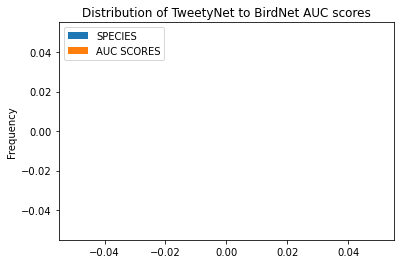

In [29]:
#auc_scores_df.plot.hist(y='AUC SCORES', rot=0, density = True)
auc_scores_df.plot.hist(bins=15, density = True, title = "Distribution of TweetyNet to BirdNet AUC scores")

In [30]:
#matplotlib

### Distribution of TweetyNet Pipeline AUC Scores

<AxesSubplot:title={'center':'Distribution of TweetyNet to BirdNet AUC scores'}, ylabel='Frequency'>

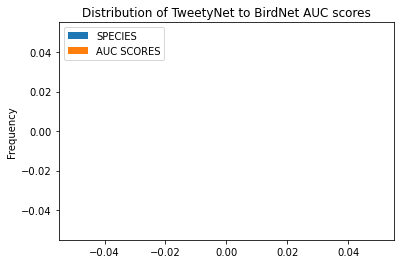

In [31]:
tweetyNet_auc_scores_df.plot.hist(bins=15, density = True, title = "Distribution of TweetyNet to BirdNet AUC scores")

In [32]:
# merge data frames
df_cd = pd.merge(auc_scores_df, tweetyNet_auc_scores_df, on='SPECIES', suffixes=('_TweetyNetToBirdNet', '_TweetyNet'), how = "left")
df_cd

,AUC SCORES_TweetyNetToBirdNet,SPECIES,AUC SCORES_TweetyNet


In [33]:
# chekc the class list on both of themn

C:\Users\Siloux\.conda\envs\species-id\lib\site-packages\numpy\lib\histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


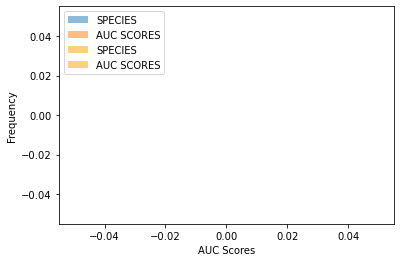

In [34]:
# can we look at them sideby side 
# combine 
from matplotlib import pyplot as plt
fig, ax = plt.subplots()
auc_scores_df.plot.hist(bins=10, density = True, ax = ax, alpha=0.5, label= 'Tweety to Birdnet Pipeline')
tweetyNet_auc_scores_df.plot.hist(bins=10, density = True, ax = ax, color = "#FFA500",alpha=0.5,label='TweetyNet Pipeline')
plt.xlabel('AUC Scores')
plt.title = "Distribution of AUC scores"
plt.show()
# consistent with the ROC scores; in general the 
# cleaner way of visualizing 

# TO DO: Statistics Metrics

### Statistics Metrics on TweetyNet to BirdNET pipeline

In [35]:
manual_chunked_df

,FOLDER,IN FILE,CLIP LENGTH,CHANNEL,OFFSET,DURATION,SAMPLE RATE,MANUAL ID,CONFIDENCE
0,./COSMOS,XC87449,23.2956,0,0.0,3.0,44100,Celeus grammicus,1
1,./COSMOS,XC87449,23.2956,0,3.0,3.0,44100,Celeus grammicus,1
2,./COSMOS,XC87449,23.2956,0,9.0,3.0,44100,Celeus grammicus,1
3,./COSMOS,XC87449,23.2956,0,12.0,3.0,44100,Celeus grammicus,1
4,./COSMOS,XC87449,23.2956,0,18.0,3.0,44100,Celeus grammicus,1
...,...,...,...,...,...,...,...,...,...
5643,./COSMOS,XC27942,31.3404,0,6.0,3.0,44100,Tolmomyias sulphurescens,1
5644,./COSMOS,XC27942,31.3404,0,9.0,3.0,44100,Tolmomyias sulphurescens,1
5645,./COSMOS,XC27942,31.3404,0,15.0,3.0,44100,Tolmomyias sulphurescens,1
5646,./COSMOS,XC27942,31.3404,0,21.0,3.0,44100,Tolmomyias sulphurescens,1


In [36]:
t2b_statistics_df = automated_labeling_statistics(manual_chunked_df, multi_df, stats_type="general")
t2b_statistics_df

Something went wrong with 484 clips out of 484 clips


""


In [37]:
global_dataset_statistics(t2b_statistics_df)

KeyError: 'TRUE POSITIVE'

In [ ]:
t2b_clip_stats = clip_statistics(automated_df_tweety, manual_df)
t2b_clip_stats

In [ ]:
t2b_class_statistics(t2b_clip_stats)

### Statistics Metrics on TweetyNet

In [ ]:
manual_df["MANUAL ID"] = manual_df["MANUAL ID"].apply(lambda x: x.split(" ")[0] + " "+ x.split(" ")[1])

In [ ]:
tweety_statistics_df = automated_labeling_statistics(manual_df, automated_df_tweety, stats_type="general")

In [ ]:
tweety_statistics_df

In [ ]:
global_dataset_statistics(tweety_statistics_df)

In [ ]:
clip_stats = clip_statistics(automated_df_tweety, manual_df)
clip_stats

In [ ]:
class_statistics(clip_stats)

In [47]:
automated_df_tweety.to_csv("autoamted_cosmos_tweety_to_file.csv")

In [48]:
multi_df.to_csv("autoamted_cosmos_tweety_to_birdnet.csv")

In [50]:
automated_df_tweety.to_csv("autoamted_cosmos_tweety_to_file.csv")